In [ ]:
!pip install yfinance==0.2.50
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pandas as pd
import yfinance as yf

## **Stop download data!!**

In [ ]:
# # Flag to control data fetching
# fetch_data = True  # Set to True to fetch data for all tickers

# # Load TOPIX 30 data from CSV file in the data folder with specified dtype
# dtype_dict = {
#     'Company Name': 'string',
#     'Ticker Symbol (JP)': 'string'
# }

# # Define the corrected data
# data = {
#     'Company Name': [
#         'Seven & I Holdings Co.,Ltd.', 'Shin-Etsu Chemical Co.,Ltd.', 'Takeda Pharmaceutical Company Limited',
#         'Astellas Pharma Inc.', 'Daiichi Sankyo Company,Limited', 'Recruit Holdings Co.,Ltd.',
#         'Smc Corporation', 'Daikin Industries,Ltd.', 'Hitachi,Ltd.', 'Nidec Corporation',
#         'Sony Group Corporation', 'Keyence Corporation', 'Fanuc Corporation', 'Murata Manufacturing Co.,Ltd.',
#         'Toyota Motor Corporation', 'Honda Motor Co.,Ltd.', 'Hoya Corporation', 'Nintendo Co.,Ltd.',
#         'Itochu Corporation', 'Mitsui & Co.,Ltd.', 'Tokyo Electron Limited', 'Mitsubishi Corporation',
#         'Mitsubishi Ufj Financial Group,Inc.', 'Sumitomo Mitsui Financial Group,Inc.', 'Mizuho Financial Group,Inc.',
#         'Tokio Marine Holdings,Inc.', 'Nippon Telegraph And Telephone Corporation', 'Kddi Corporation',
#         'Softbank Corp.', 'Softbank Group Corp.'
#     ],
#     'Ticker Symbol (US)': [
#         'SVNDY', 'SHECY', 'TAK', 'ALPMY', 'DSNKY', 'RCRUY', 'SMCAY', 'DKILY', 'HTHIY', 'NNDNF',
#         'SONY', 'KYCCF', 'FANUY', 'MRAAY', 'TM', 'HMC', 'HOCPY', 'NTDOY', 'ITOCY', 'MITSY',
#         'TOELY', 'MSBHF', 'MUFG', 'SMFG', 'MFG', 'TKOMY', 'NTTYY', 'KDDIY', 'SFTBY', 'SFTBF'
#     ],
#     'Ticker Symbol (JP)': [
#         '3382.T', '4063.T', '4502.T', '4503.T', '4568.T', '6098.T', '6273.T', '6367.T', '6501.T', '6594.T',
#         '6758.T', '6861.T', '6954.T', '6981.T', '7203.T', '7267.T', '7741.T', '7974.T', '8001.T', '8031.T',
#         '8035.T', '8058.T', '8306.T', '8316.T', '8411.T', '8766.T', '9432.T', '9433.T', '9434.T', '9984.T'
#     ]
# }

# # Create a DataFrame
# topix_30_df = pd.DataFrame(data)
# topix_30_df.to_csv('/content/topix_30_tickers.csv', index = False)
# print("Data saved to topix_30_tickers.csv.")

# # Define date range for fetching data
# start_date = '2020-10-31'
# end_date = '2024-10-31'

# # Load TOPIX 30 data from CSV file in the data folder
# dtype_dict = {
#     'Company Name': 'string',
#     'Ticker Symbol (JP)': 'string'
# }
# topix_30_df = pd.read_csv('/content/topix_30_tickers.csv', dtype=dtype_dict, low_memory=False)

# # ---------------------------------------------
# # Fetch Daily Prices for TOPIX 30 Companies
# # ---------------------------------------------

# # Flag to control data fetching
# fetch_data = True  # Set to True to fetch data for all tickers

# # Initialize the combined DataFrame
# prices_combined_df = pd.DataFrame()

# if fetch_data:
#     for _, row in topix_30_df.iterrows():
#         company_name = row['Company Name']
#         ticker_jp = row['Ticker Symbol (JP)']

#         # Fetch data using yfinance
#         print(f"Fetching daily price data for {company_name} ({ticker_jp})")
#         data = yf.download(ticker_jp, start=start_date, end=end_date, progress=False)

#         # Check if data is available
#         if not data.empty:
#             # Flatten multi-level column index if necessary
#             if isinstance(data.columns, pd.MultiIndex):
#                 data.columns = data.columns.get_level_values(1)

#             data.reset_index(inplace=True)
#             data['Company Name'] = company_name
#             data['Ticker Symbol (JP)'] = ticker_jp

#             # Rename columns for clarity
#             data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Company Name', 'Ticker Symbol (JP)']

#             # Append to the combined DataFrame
#             prices_combined_df = pd.concat([prices_combined_df, data], ignore_index=True)
#         else:
#             print(f"No price data available for {company_name} ({ticker_jp})")
# else:
#     # Load existing data if fetching is disabled
#     prices_combined_df = pd.read_csv('/content/topix_30_combined_daily_prices.csv', low_memory=False)
#     print("Data fetching is disabled. Loaded existing data.")

# # Reorder columns and format the date column
# prices_combined_df = prices_combined_df[[
#     'Date', 'Company Name', 'Ticker Symbol (JP)',
#     'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
# ]]
# prices_combined_df['Date'] = pd.to_datetime(prices_combined_df['Date']).dt.strftime('%d/%m/%Y')

# # Save the daily prices data
# prices_combined_df.to_csv('/content/topix_30_combined_daily_prices.csv', index=False)
# print("Daily prices saved to /content/topix_30_combined_daily_prices.csv.")

# # ---------------------------------------------
# # Fetch Shares Outstanding Data for TOPIX 30
# # ---------------------------------------------

# # Define the date range for month-end dates
# date_range_me = pd.date_range(start=start_date, end=end_date, freq='M')

# shares_data = []

# for _, row in topix_30_df.iterrows():
#     company_name = row['Company Name']
#     ticker_jp = row['Ticker Symbol (JP)']

#     try:
#         # Fetch shares outstanding from yfinance
#         ticker = yf.Ticker(ticker_jp)
#         shares_outstanding = ticker.info.get('sharesOutstanding')

#         # Create DataFrame aligned with the date range
#         shares_df = pd.DataFrame({
#             'Date': date_range_me,
#             'Shares Outstanding': [shares_outstanding] * len(date_range_me),
#             'Company Name': company_name,
#             'Ticker Symbol (JP)': ticker_jp
#         })
#         shares_data.extend(shares_df.to_dict('records'))
#     except Exception as e:
#         print(f"Shares outstanding data not available for {company_name} ({ticker_jp}): {e}")
#         continue

# # Create DataFrame for shares outstanding
# shares_outstanding_df = pd.DataFrame(shares_data)

# # Save the shares outstanding data
# shares_outstanding_df.to_csv('/content/topix_30_shares_outstanding_monthly.csv', index=False)
# print("Shares outstanding saved to /content/topix_30_shares_outstanding_monthly.csv.")

# # ---------------------------------------------
# # Combine Prices and Shares Outstanding
# # ---------------------------------------------

# # Load the saved data
# prices_combined_df = pd.read_csv('/content/topix_30_combined_daily_prices.csv', encoding='utf-8', dayfirst=True)
# shares_outstanding_df = pd.read_csv('/content/topix_30_shares_outstanding_monthly.csv', encoding='utf-8', dayfirst=True)

# # Ensure date columns are datetime and other columns match in type
# prices_combined_df['Date'] = pd.to_datetime(prices_combined_df['Date'], dayfirst=True)
# shares_outstanding_df['Date'] = pd.to_datetime(shares_outstanding_df['Date'], dayfirst=True)

# # Merge the data
# combined_df = pd.merge(
#     prices_combined_df,
#     shares_outstanding_df[['Date', 'Shares Outstanding', 'Ticker Symbol (JP)']],
#     on=['Date', 'Ticker Symbol (JP)'],
#     how='left'
# )

# # Backfill and forward-fill missing shares outstanding
# combined_df['Shares Outstanding Filled'] = combined_df.groupby('Ticker Symbol (JP)')['Shares Outstanding'].ffill().bfill()

# # Calculate market cap and weights
# combined_df['Market Cap'] = combined_df['Adj Close'] * combined_df['Shares Outstanding Filled'] / 1_000_000_000_000
# combined_df['Daily TOPIX Core 30 Market Cap Sum'] = combined_df.groupby('Date')['Market Cap'].transform('sum')
# combined_df['Weight (%)'] = (combined_df['Market Cap'] / combined_df['Daily TOPIX Core 30 Market Cap Sum']) * 100

# # Reorder columns
# combined_df = combined_df[[
#     'Date', 'Company Name', 'Ticker Symbol (JP)', 'Open', 'High', 'Low',
#     'Close', 'Adj Close', 'Volume', 'Shares Outstanding Filled', 'Market Cap',
#     'Daily TOPIX Core 30 Market Cap Sum', 'Weight (%)'
# ]]

# # Save the final combined data
# combined_df.to_csv('/content/topix_30_final_combined_data.csv', index=False)
# print("Final combined data saved to /content/topix_30_final_combined_data.csv.")


## **Load Data**

download the data from below link and drop them to the Files:
https://drive.google.com/file/d/14DdUxLZNBlopZXf20SKta8Vwu8gg5Hlb/view?usp=drive_link

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import plotly.graph_objects as go
import plotly.io as pio

# Set Plotly to render plots in the default browser
pio.renderers.default = 'colab'

# ---------------------------------------------
# Set Up and Load Data
# ---------------------------------------------


# Load the saved combined data from Script 1
combined_data_path = '/content/topix_30_final_combined_data.csv'
combined_df = pd.read_csv(combined_data_path, encoding='utf-8')

# ---------------------------------------------
# Data Processing and Monthly Sampling
# ---------------------------------------------

# Ensure Date column is in datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')

# Sort data by Ticker and Date
combined_df.sort_values(by=['Ticker Symbol (JP)', 'Date'], inplace=True)

# Resample data by month-end, preserving the Ticker Symbol (JP) column
monthly_df = (
    combined_df.set_index('Date')
    .groupby('Ticker Symbol (JP)', group_keys=False)
    .resample('ME')  # Month-end frequency
    .last()
    .reset_index()
)

# Calculate monthly weights
monthly_df['Monthly TOPIX Core 30 Market Cap Sum'] = monthly_df.groupby('Date')['Market Cap'].transform('sum')
monthly_df['Weight (%)'] = (monthly_df['Market Cap'] / monthly_df['Monthly TOPIX Core 30 Market Cap Sum']) * 100

monthly_df.to_csv('/content/monthly_df.csv')

# Pivot data for plotting
weights_df = monthly_df.pivot(index='Date', columns='Company Name', values='Weight (%)')

# Save the weights DataFrame
weights_df.to_csv('/content/topix_30_monthly_weights.csv')
print("Monthly weights saved to /content/topix_30_monthly_weights.csv.")

# Prepare TOPIX Core 30 market cap data for plotting
topix_index = combined_df[['Date', 'Daily TOPIX Core 30 Market Cap Sum']].dropna()
topix_index.set_index('Date', inplace=True)

# Pivot the monthly data to get adjusted close prices
monthly_price = monthly_df.pivot(index='Date', columns='Company Name', values='Adj Close')

# Calculate monthly percentage changes for returns
monthly_returns = monthly_price.pct_change().dropna()

# Save the monthly returns DataFrame
monthly_returns.to_csv('/content/monthly_returns_ME.csv')
print("Monthly returns saved to /content/monthly_returns_ME.csv.")

# ---------------------------------------------
# Portfolio Analytics and Optimization Functions
# ---------------------------------------------

def annualize_rets(ret, periods_per_year=12):
    """Calculates annualized returns."""
    compounded_growth = (1 + ret).prod()
    n_periods = ret.shape[0]
    return compounded_growth ** (periods_per_year / n_periods) - 1


def portfolio_return(weights, returns):
    """Calculates portfolio return given weights."""
    return weights.T @ returns


def portfolio_vol(weights, covmat):
    """Calculates portfolio volatility given weights and covariance matrix."""
    vol = weights.T @ covmat @ weights
    return vol ** 0.5


def msr(riskfree_rate, ret, covmat, bound=(0.008, 0.1)):
    """Finds the portfolio weights that maximize the Sharpe Ratio."""
    n = ret.shape[0]
    init_guess = np.repeat(1 / n, n)
    bounds = (bound,) * n
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    def neg_sharpe(weights, riskfree_rate, er, cov):
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate) / vol

    weights = minimize(neg_sharpe, init_guess, args=(riskfree_rate, ret, covmat),
                       method='SLSQP', options={'disp': False},
                       constraints=(weights_sum_to_1,), bounds=bounds)
    return weights.x

def minimize_vol(target_return, ret, cov, bound=(0.008, 0.1)):
    """Finds the weights that minimize volatility for a target return."""
    n = ret.shape[0]
    init_guess = np.repeat(1 / n, n)
    bounds = (bound,) * n
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    return_is_target = {'type': 'eq', 'args': (ret,),
                        'fun': lambda weights, ret: target_return - portfolio_return(weights, ret)}

    weights = minimize(portfolio_vol, init_guess, args=(cov,), method='SLSQP',
                       options={'disp': False}, constraints=(weights_sum_to_1, return_is_target),
                       bounds=bounds)
    return weights.x


# ---------------------------------------------
# Calculate Optimized Portfolio Weights
# ---------------------------------------------

# Initialize an empty list to store optimized weights for each month
optimized_weights_list = []

# Loop through each unique date in the index of monthly_returns
for date in monthly_returns.index:
    # Slice the returns data up to the current date
    historical_returns = monthly_returns.loc[:date]

    # Calculate the covariance matrix for the historical returns
    cov_matrix = historical_returns.cov()

    # Calculate expected returns by annualizing the historical returns
    expected_returns = annualize_rets(historical_returns)

    # Calculate optimized weights (maximize Sharpe Ratio)
    opt_weights = msr(riskfree_rate=0.01, ret=expected_returns, covmat=cov_matrix)

    # Append the optimized weights to the list
    optimized_weights_list.append(opt_weights)

# Convert the optimized weights list into a DataFrame
optimized_weights_df = pd.DataFrame(
    optimized_weights_list,
    index=monthly_returns.index,
    columns=monthly_returns.columns
)

# Normalize weights to ensure they sum to 100% for visualization
optimized_weights_df = optimized_weights_df.div(optimized_weights_df.sum(axis=1), axis=0) * 100

# Save the optimized weights DataFrame
optimized_weights_df.to_csv('/content/topix_30_optimized_weights.csv')
print("Optimized weights saved to /content/topix_30_optimized_weights.csv.")


# ---------------------------------------------
# Efficient Frontier with CML
# ---------------------------------------------

def plot_efficient_frontier_with_cml(ret, cov, bound=(0.008, 0.1), riskfree_rate=0, is_risky_parity=False, is_min_vol=False):
    """Plots the entire efficient frontier with the CML and marks the tangent portfolio."""
    n_points = 100
    # Extend the range of target returns to 1.5x the maximum expected return
    target_returns = np.linspace(ret.min(), ret.max() * 1.5, n_points)
    weights = [minimize_vol(target_return, ret, cov, bound) for target_return in target_returns]
    vols = [portfolio_vol(w, cov) for w in weights]
    rets = [portfolio_return(w, ret) for w in weights]

    # Calculate Sharpe ratio-maximized portfolio (MSR)
    weights_msr = msr(riskfree_rate, ret, cov, bound)
    r_msr = portfolio_return(weights_msr, ret)
    vol_msr = portfolio_vol(weights_msr, cov)

    # Plot efficient frontier
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=vols, y=rets, mode='lines+markers', name='Efficient Frontier'))

    # Add CML
    fig.add_trace(go.Scatter(
        x=[0, vol_msr], y=[riskfree_rate, r_msr],
        mode='lines',
        name='Capital Market Line (CML)',
        line=dict(dash='dash', color='green')
    ))

    # Add tangent portfolio point
    fig.add_trace(go.Scatter(
        x=[vol_msr], y=[r_msr],
        mode='markers',
        name='Tangent Portfolio',
        marker=dict(color='red', size=10, symbol='circle')
    ))

    #  Add Risky opt point
    if is_risky_parity:
        w_risky_parity = min_risk_parity(riskfree_rate, ret, cov, bound)
        r_risky_parity = portfolio_return(w_risky_parity, ret)
        vol_risky_parity = portfolio_vol(weights=w_risky_parity, covmat=cov)

        w_risky_parity_max_ret = maximize_return(vol_risky_parity, ret, cov, bound)
        r_risky_parity_max_ret = portfolio_return(w_risky_parity_max_ret, ret)
        vol_risky_parity_max_ret = portfolio_vol(w_risky_parity_max_ret, cov)

        fig.add_trace(go.Scatter(
            x=[vol_risky_parity], y=[r_risky_parity],
            mode='markers',
            name='Min Risky Parity Portfolio',
            marker=dict(color='rgb(204, 20, 204)', size=10, symbol='triangle-up')
        ))

        fig.add_trace(go.Scatter(
            x=[vol_risky_parity_max_ret], y=[r_risky_parity_max_ret],
            mode='markers',
            name='Min Risky Parity Portfolio (Max Ret)',
            marker=dict(color='rgb(204, 20, 204)', size=10, symbol='triangle-down')
        ))

        fig.add_trace(go.Scatter(
            x=[vol_risky_parity, vol_risky_parity_max_ret], y=[r_risky_parity, r_risky_parity_max_ret],
            mode='lines',
            name='Min Risky Parity Vol Line',
            line=dict(dash='dash', color='rgb(204, 20, 204)')
        ))

    if is_min_vol:
        w_min_vol = min_volatility(riskfree_rate, ret, cov, bound)
        r_min_vol = portfolio_return(w_min_vol, ret)
        vol_min_vol = portfolio_vol(weights=w_min_vol, covmat=cov)

        fig.add_trace(go.Scatter(
            x=[vol_min_vol], y=[r_min_vol],
            mode='markers',
            name='Min Volatility Portfolio',
            marker=dict(color='rgb(104, 120, 4)', size=10, symbol='x')
        ))

    fig.update_layout(
        title="Efficient Frontier with CML",
        xaxis_title="Volatility",
        yaxis_title="Returns"
    )
    fig.show()


def plot_topix_index_with_slider(topix_index):
    """Creates a clean time-series plot of the TOPIX index."""
    # Ensure 'Date' is set as the index
    if 'Date' in topix_index.columns:
        topix_index.set_index('Date', inplace=True)

    # Drop any remaining NaN values in 'Daily TOPIX Core 30 Market Cap Sum'
    topix_index.dropna(subset=['Daily TOPIX Core 30 Market Cap Sum'], inplace=True)

    fig = go.Figure()


    # Plot only the 'Daily TOPIX Core 30 Market Cap Sum' column
    fig.add_trace(go.Scatter(
        x=topix_index.index,  # Use the index (Date) as the x-axis
        y=topix_index['Daily TOPIX Core 30 Market Cap Sum'],  # Plot the Market Cap
        mode='markers',
        name='TOPIX Core 30 Market Cap'
    ))
    # Configure the layout

    fig.update_layout(
        title="TOPIX Core 30 Market Cap Over Time",
        xaxis=dict(
            title="Date",
            rangeslider=dict(visible=True),  # Add interactive slider
        ),
        yaxis=dict(title="Market Cap"),
    )

    fig.show()

# ---------------------------------------------
# Pie Chart with Optimized Weights
# ---------------------------------------------

def plot_optimized_weight_evolution_with_slider(opt_weights_df):
    """Creates a dynamic pie chart showing optimized portfolio weights evolution with a time slider."""
    dates = opt_weights_df.index
    company_names = opt_weights_df.columns

    fig = go.Figure()

    # Create initial pie chart
    initial_data = opt_weights_df.iloc[0]
    fig.add_trace(go.Pie(
        labels=company_names,
        values=initial_data,
        name=f"{dates[0].strftime('%Y-%m-%d')}"
    ))

    # Add frames for the slider
    frames = []
    for i, date in enumerate(dates):
        frame_data = opt_weights_df.iloc[i]
        frames.append(go.Frame(
            data=[go.Pie(labels=company_names, values=frame_data)],
            name=str(date),
            layout=go.Layout(title=f"Optimized Portfolio Weights on {date.strftime('%Y-%m-%d')}")
        ))

    # Add the frames to the figure
    fig.frames = frames

    # Configure the slider
    sliders = [{
        "active": 0,
        "currentvalue": {"prefix": "Date: ", "font": {"size": 20}},
        "steps": [
            {
                "args": [[str(date)], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate"}],
                "label": date.strftime('%Y-%m-%d'),
                "method": "animate"
            } for date in dates
        ]
    }]

    # Configure the layout
    fig.update_layout(
        title="Optimized Portfolio Weights Evolution Over Time",
        updatemenus=[{
            "buttons": [
                {"args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}],
                 "label": "Play", "method": "animate"},
                {"args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}],
                 "label": "Pause", "method": "animate"}
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }],
        sliders=sliders
    )

    fig.show()

def plot_optimized_weight_evolution_with_slider_Top10(opt_weights_df, min_thd = 1):
    """Creates a dynamic pie chart showing optimized portfolio weights evolution with a time slider."""
    dates = opt_weights_df.index

    top10w = opt_weights_df.iloc[0].sort_values(ascending=False)
    top10w = top10w[top10w > min_thd]
    top10w_1_val = np.array(top10w.values.tolist() + [opt_weights_df.iloc[0].sum() - top10w.sum()])
    top10w_1_idx = top10w.index.to_list() + ['Others']

    fig = go.Figure()

    # Create initial pie chart
    initial_data = top10w_1_val
    fig.add_trace(go.Pie(
        labels=top10w_1_idx,
        values=initial_data,
        name=f"{dates[0].strftime('%Y-%m-%d')}"
    ))

    # Add frames for the slider
    frames = []
    for i, date in enumerate(dates):
        top10w = opt_weights_df.iloc[i].sort_values(ascending=False)
        top10w = top10w[top10w > min_thd]
        top10w_1_val = np.array(top10w.values.tolist() + [opt_weights_df.iloc[i].sum() - top10w.sum()])
        top10w_1_idx = top10w.index.to_list() + ['Others']

        frames.append(go.Frame(
            data=[go.Pie(labels=top10w_1_idx, values=top10w_1_val)],
            name=str(date),
            layout=go.Layout(title=f"Optimized Portfolio Weights on {date.strftime('%Y-%m-%d')}")
        ))

    # Add the frames to the figure
    fig.frames = frames

    # Configure the slider
    sliders = [{
        "active": 0,
        "currentvalue": {"prefix": "Date: ", "font": {"size": 20}},
        "steps": [
            {
                "args": [[str(date)], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate"}],
                "label": date.strftime('%Y-%m-%d'),
                "method": "animate"
            } for date in dates
        ]
    }]

    # Configure the layout
    fig.update_layout(
        title="Optimized Portfolio Weights Evolution Over Time",
        updatemenus=[{
            "buttons": [
                {"args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}],
                 "label": "Play", "method": "animate"},
                {"args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}],
                 "label": "Pause", "method": "animate"}
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }],
        sliders=sliders
    )

    fig.show()


# ---------------------------------------------
# Plot Results
# ---------------------------------------------

# Get the last date from the index of monthly_returns
last_date = monthly_returns.index[-1]

# Slice historical returns up to the last date
historical_returns = monthly_returns.loc[:last_date]

# Calculate the covariance matrix for the historical returns
cov_matrix = historical_returns.cov()

# Calculate expected returns by annualizing the historical returns
expected_returns = annualize_rets(historical_returns)


Monthly weights saved to /content/topix_30_monthly_weights.csv.
Monthly returns saved to /content/monthly_returns_ME.csv.


/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:11211: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds dur

Optimized weights saved to /content/topix_30_optimized_weights.csv.


In [ ]:
# Plot the Efficient Frontier with the CML
plot_efficient_frontier_with_cml(expected_returns, cov_matrix, bound=(0.008, 0.1), riskfree_rate=0.01)

In [ ]:
# Plot TOPIX index with slider
plot_topix_index_with_slider(topix_index)

Fetching daily price data for 1311.T


<ipython-input-6-7901819bc4f8>:36: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



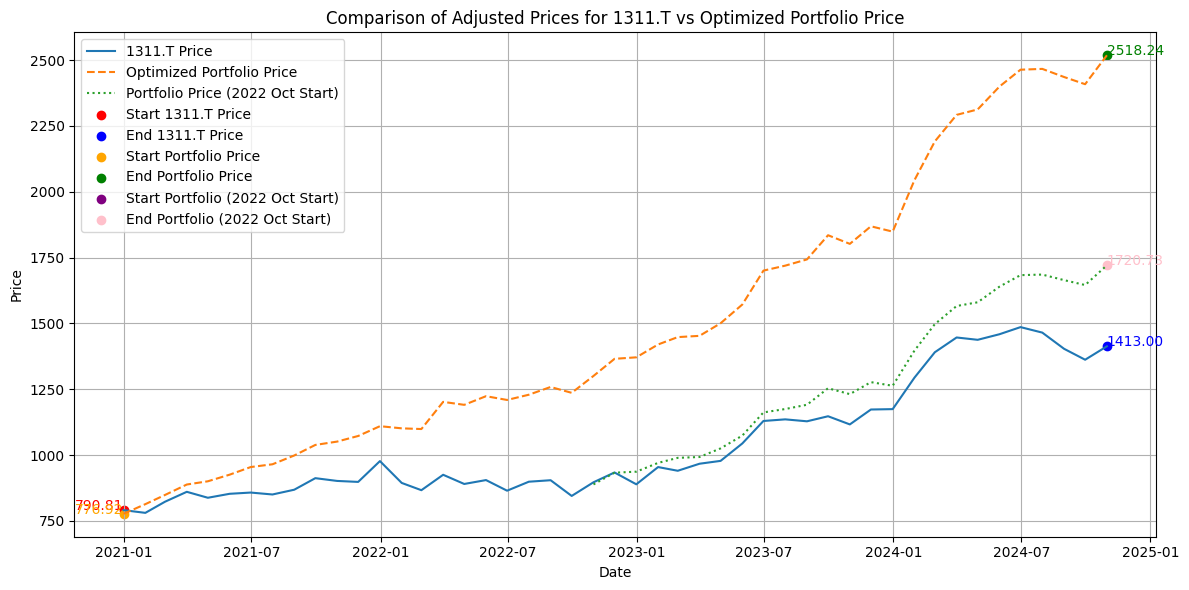

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
ticker_to_compare = "1311.T"
start_date = "2020-10-31"
end_date = "2024-10-31"

# Fetch data for 1311.T using yfinance
print(f"Fetching daily price data for {ticker_to_compare}")
data = yf.download(ticker_to_compare, start=start_date, end=end_date, progress=False)

if not data.empty:
    # Flatten multi-level column index if necessary
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(1)

    # Reset the index and add company details
    data.reset_index(inplace=True)
    data['Company Name'] = "1311.T Company"  # Placeholder name
    data['Ticker Symbol (JP)'] = ticker_to_compare

    # Rename columns for clarity
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Company Name', 'Ticker Symbol (JP)']
else:
    raise ValueError(f"No price data available for {ticker_to_compare}")

# Prepare the adjusted price DataFrame
actual_prices = data[['Date', 'Adj Close']].rename(columns={'Adj Close': '1311.T Price'})

# Ensure dates are timezone-naive
actual_prices['Date'] = pd.to_datetime(actual_prices['Date']).dt.tz_localize(None)

# Extract monthly end prices (ME)
actual_prices = actual_prices.set_index('Date').resample('M').last().reset_index()

# Load portfolio returns and calculate portfolio price series
monthly_returns = pd.read_csv('/content/monthly_returns_ME.csv', index_col=0, parse_dates=True)
optimized_weights_df = pd.read_csv('/content/topix_30_optimized_weights.csv', index_col=0, parse_dates=True)

# Divide portfolio returns by 100 (assuming they are in %)
portfolio_returns = (optimized_weights_df * monthly_returns).sum(axis=1) / 100

# Ensure portfolio return dates are timezone-naive
portfolio_returns.index = portfolio_returns.index.tz_localize(None)

# Get initial prices dynamically from 1311.T adjusted prices
start_new_portfolio = pd.to_datetime("2022-10-31")  # Convert to datetime
initial_price_main = actual_prices.loc[actual_prices['Date'] >= pd.to_datetime(start_date), '1311.T Price'].iloc[0]
initial_price_new = actual_prices.loc[actual_prices['Date'] >= start_new_portfolio, '1311.T Price'].iloc[0]

# Align the new portfolio price with 1311.T price on September 2022
price_sept_2022 = actual_prices.loc[actual_prices['Date'] == pd.to_datetime("2022-09-30"), '1311.T Price'].iloc[0]
filtered_returns = portfolio_returns[portfolio_returns.index >= start_new_portfolio]
portfolio_prices_new = (1 + filtered_returns).cumprod() * price_sept_2022
portfolio_prices_new_df = portfolio_prices_new.reset_index()
portfolio_prices_new_df.columns = ['Date', 'Portfolio Price (2022 Oct Start)']

# Convert portfolio returns into portfolio price series
portfolio_prices = (1 + portfolio_returns).cumprod() * initial_price_main
portfolio_prices_df = portfolio_prices.reset_index()
portfolio_prices_df.columns = ['Date', 'Portfolio Price']

# Merge actual prices of 1311.T with both portfolio price series
comparison_prices_df = pd.merge(actual_prices, portfolio_prices_df, on='Date', how='inner')
comparison_prices_df = pd.merge(comparison_prices_df, portfolio_prices_new_df, on='Date', how='left')

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.plot(comparison_prices_df['Date'], comparison_prices_df['1311.T Price'], label='1311.T Price')
plt.plot(comparison_prices_df['Date'], comparison_prices_df['Portfolio Price'], label='Optimized Portfolio Price', linestyle='--')
plt.plot(comparison_prices_df['Date'], comparison_prices_df['Portfolio Price (2022 Oct Start)'], label='Portfolio Price (2022 Oct Start)', linestyle=':')

# Add data points and labels for the beginning and ending points
start_date_main = comparison_prices_df['Date'].iloc[0]
end_date_main = comparison_prices_df['Date'].iloc[-1]
start_price_1311 = comparison_prices_df['1311.T Price'].iloc[0]
end_price_1311 = comparison_prices_df['1311.T Price'].iloc[-1]

start_price_portfolio = comparison_prices_df['Portfolio Price'].iloc[0]
end_price_portfolio = comparison_prices_df['Portfolio Price'].iloc[-1]

start_price_portfolio_new = comparison_prices_df['Portfolio Price (2022 Oct Start)'].iloc[0]
end_price_portfolio_new = comparison_prices_df['Portfolio Price (2022 Oct Start)'].iloc[-1]

# Plot data points
plt.scatter(start_date_main, start_price_1311, color='red', label='Start 1311.T Price')
plt.scatter(end_date_main, end_price_1311, color='blue', label='End 1311.T Price')

plt.scatter(start_date_main, start_price_portfolio, color='orange', label='Start Portfolio Price')
plt.scatter(end_date_main, end_price_portfolio, color='green', label='End Portfolio Price')

plt.scatter(start_new_portfolio, start_price_portfolio_new, color='purple', label='Start Portfolio (2022 Oct Start)')
plt.scatter(end_date_main, end_price_portfolio_new, color='pink', label='End Portfolio (2022 Oct Start)')

# Add data labels
plt.text(start_date_main, start_price_1311, f"{start_price_1311:.2f}", color='red', fontsize=10, ha='right')
plt.text(end_date_main, end_price_1311, f"{end_price_1311:.2f}", color='blue', fontsize=10, ha='left')

plt.text(start_date_main, start_price_portfolio, f"{start_price_portfolio:.2f}", color='orange', fontsize=10, ha='right')
plt.text(end_date_main, end_price_portfolio, f"{end_price_portfolio:.2f}", color='green', fontsize=10, ha='left')

plt.text(start_new_portfolio, start_price_portfolio_new, f"{start_price_portfolio_new:.2f}", color='purple', fontsize=10, ha='right')
plt.text(end_date_main, end_price_portfolio_new, f"{end_price_portfolio_new:.2f}", color='pink', fontsize=10, ha='left')

# Set titles and labels
plt.title(f"Comparison of Adjusted Prices for {ticker_to_compare} vs Optimized Portfolio Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Plot Pie Chart for Optimized Weights Evolution
plot_optimized_weight_evolution_with_slider(optimized_weights_df)

In [ ]:
optimized_weights_df_drop1st = optimized_weights_df.iloc[1:, ]
plot_optimized_weight_evolution_with_slider_Top10(optimized_weights_df_drop1st)

Top 5 Most Correlated Stocks:
                                     Most Correlated  Correlation Value (Most)
0  Mizuho Financial Group,Inc. - Mitsubishi Ufj F...                  0.846027
1  Mitsubishi Ufj Financial Group,Inc. - Mizuho F...                  0.846027
2  Mizuho Financial Group,Inc. - Sumitomo Mitsui ...                  0.827478
3  Sumitomo Mitsui Financial Group,Inc. - Mizuho ...                  0.827478
4  Sumitomo Mitsui Financial Group,Inc. - Mitsubi...                  0.804045
5  Mitsubishi Ufj Financial Group,Inc. - Sumitomo...                  0.804045
6         Mitsui & Co.,Ltd. - Mitsubishi Corporation                  0.797739
7         Mitsubishi Corporation - Mitsui & Co.,Ltd.                  0.797739
8           Smc Corporation - Tokyo Electron Limited                  0.736203
9           Tokyo Electron Limited - Smc Corporation                  0.736203

Top 5 Least Correlated Stocks:
                                    Least Correlated  \
0  Nidec Corp

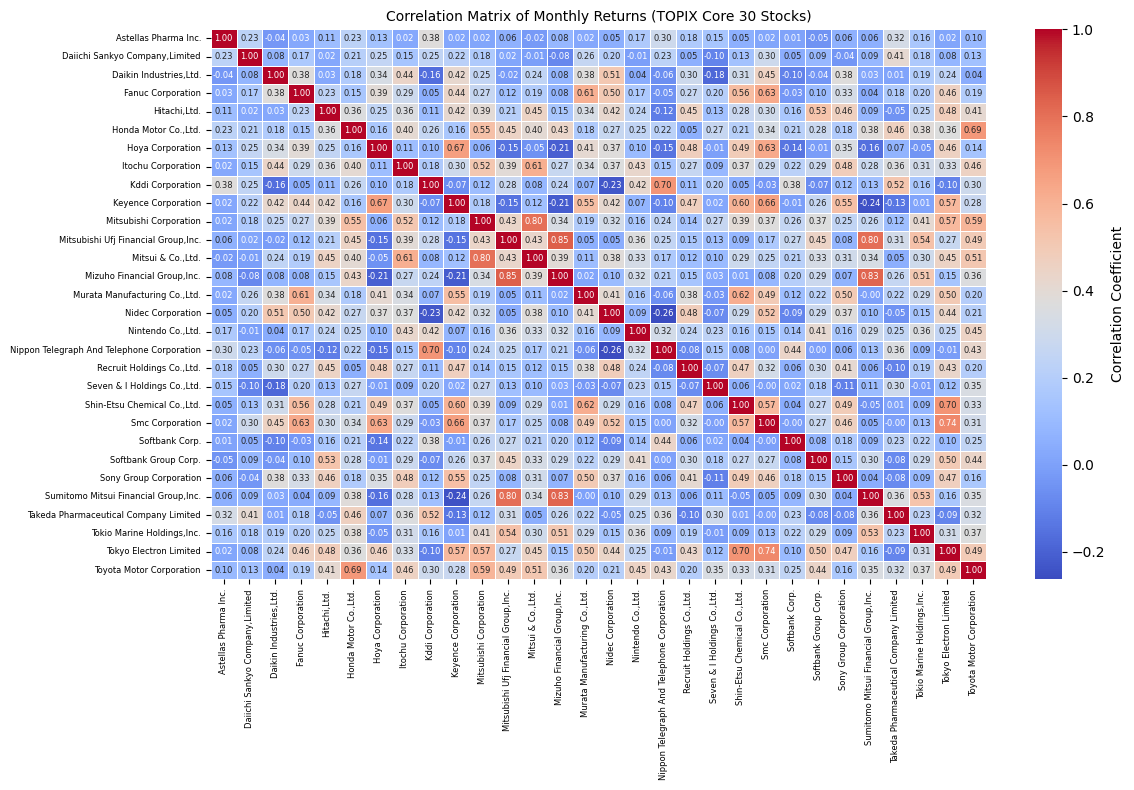

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = monthly_returns.corr()

# Find the most correlated pairs (top 5)
most_correlated = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated = most_correlated[most_correlated < 1].head(10)  # Exclude self-correlation (1.0)

# Find the least correlated pairs (bottom 5)
least_correlated = correlation_matrix.unstack().sort_values().head(10)

# Create a DataFrame to display the results
correlation_summary = pd.DataFrame({
    'Most Correlated': most_correlated.index.map(lambda x: f"{x[0]} - {x[1]}"),
    'Correlation Value (Most)': most_correlated.values,
    'Least Correlated': least_correlated.index.map(lambda x: f"{x[0]} - {x[1]}"),
    'Correlation Value (Least)': least_correlated.values
})

# Display correlation summary
print("Top 5 Most Correlated Stocks:")
print(correlation_summary[['Most Correlated', 'Correlation Value (Most)']])
print("\nTop 5 Least Correlated Stocks:")
print(correlation_summary[['Least Correlated', 'Correlation Value (Least)']])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={"size": 6}  # Smaller annotation font size
)
plt.title("Correlation Matrix of Monthly Returns (TOPIX Core 30 Stocks)", fontsize=10)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()


## VAR

                                       Company       VaR
20                      Tokyo Electron Limited -0.040545
29                        Softbank Group Corp. -0.039286
5                    Recruit Holdings Co.,Ltd. -0.033973
16                            Hoya Corporation -0.032916
4               Daiichi Sankyo Company,Limited -0.032472
7                       Daikin Industries,Ltd. -0.032019
9                            Nidec Corporation -0.031699
8                                 Hitachi,Ltd. -0.030073
6                              Smc Corporation -0.030063
11                         Keyence Corporation -0.029884
12                           Fanuc Corporation -0.029476
14                    Toyota Motor Corporation -0.028961
19                           Mitsui & Co.,Ltd. -0.028648
15                        Honda Motor Co.,Ltd. -0.028035
13               Murata Manufacturing Co.,Ltd. -0.027912
1                  Shin-Etsu Chemical Co.,Ltd. -0.027804
10                      Sony Gr

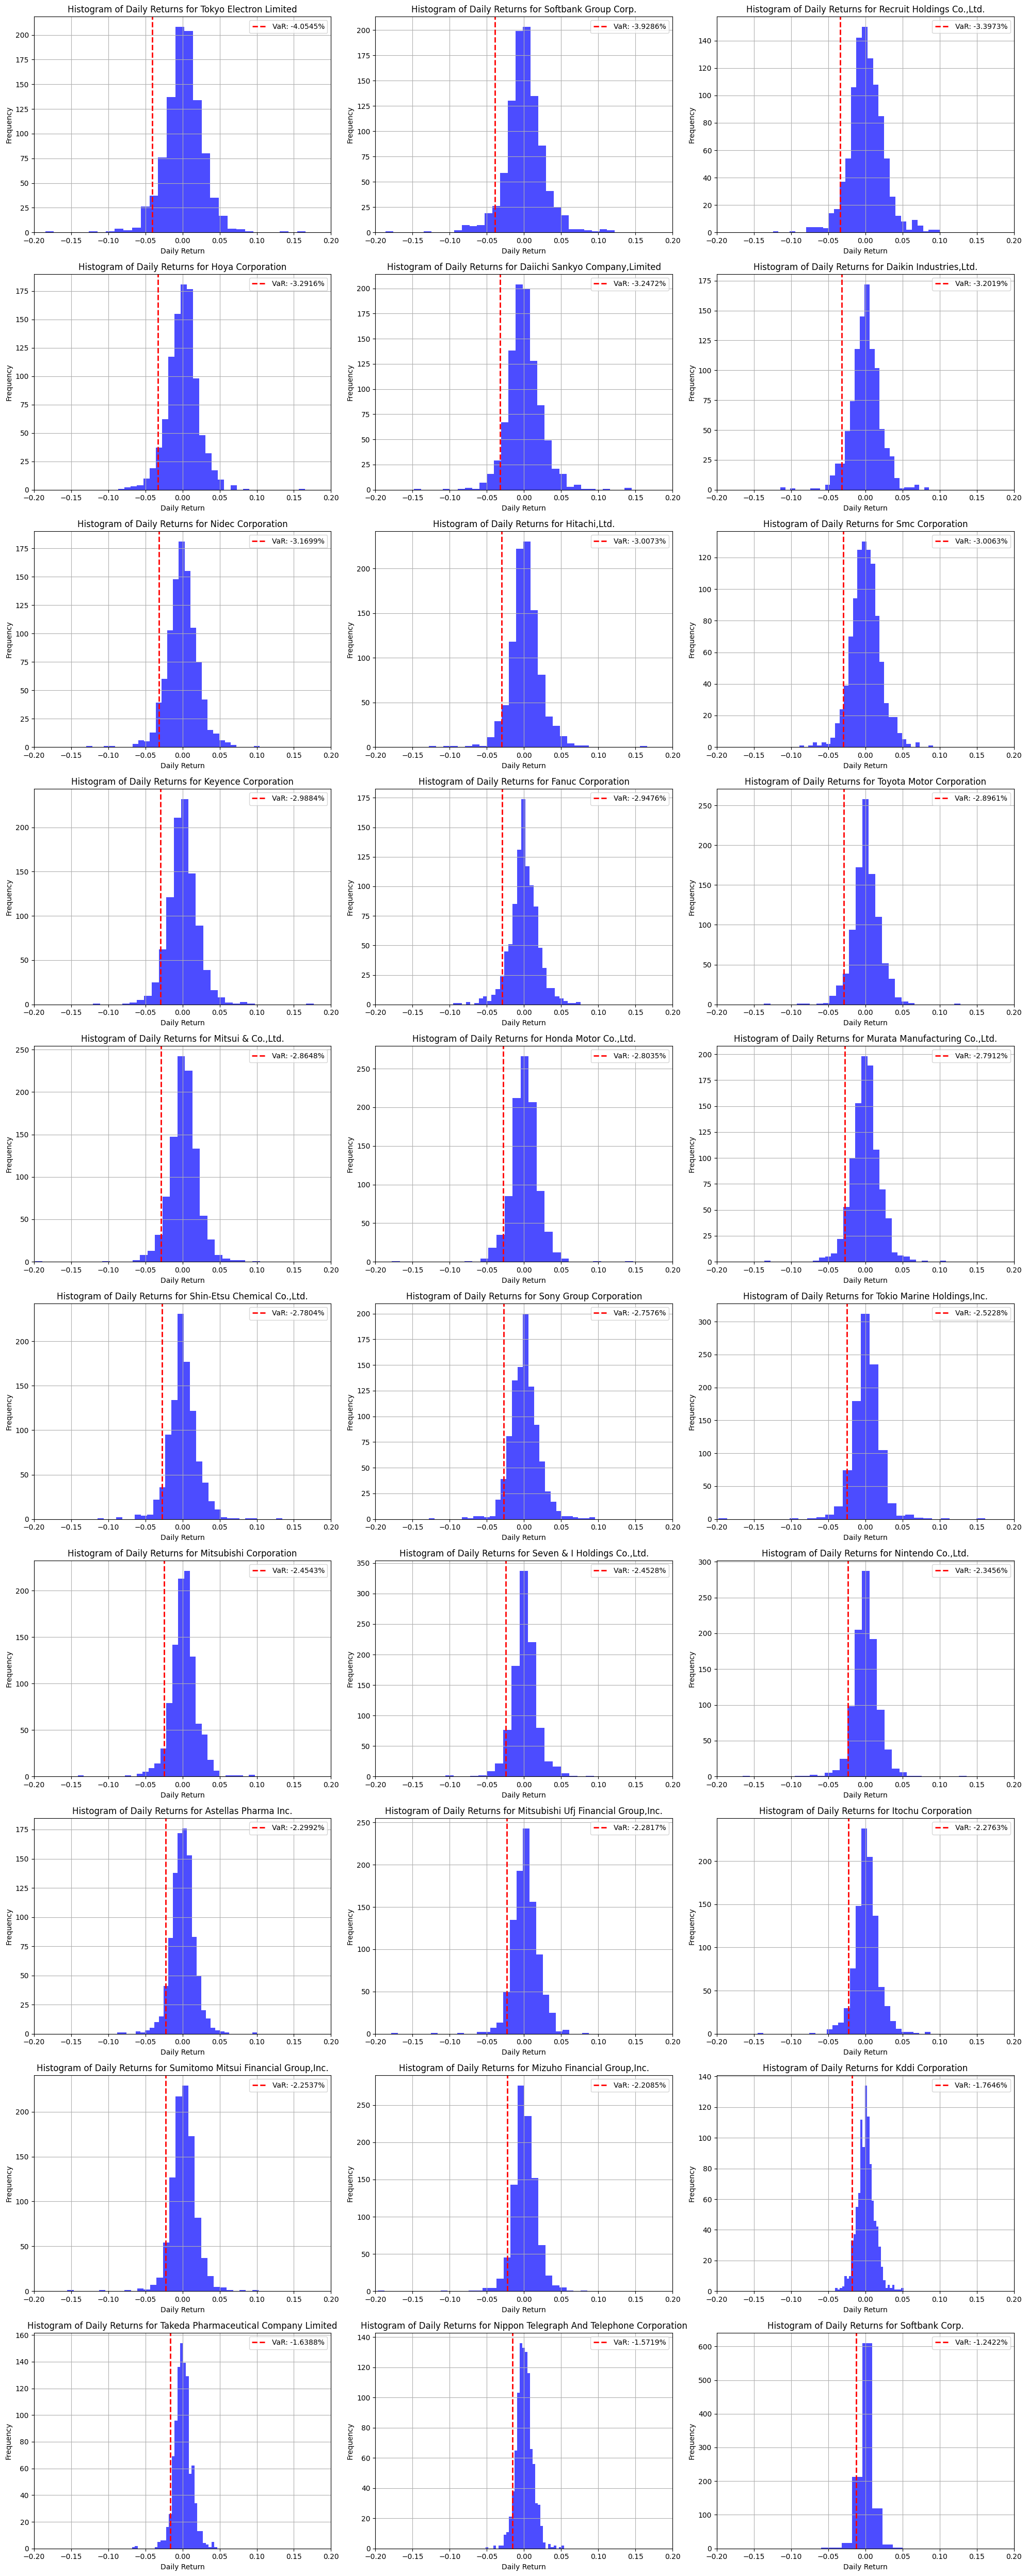

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/topix_30_combined_daily_prices.csv')

# Get a list of unique companies
companies = data['Company Name'].unique()

# Set the confidence level for VaR
confidence_level = 0.95

# Initialize a list to store company VaR values
var_results = []

# Loop through each company
for company in companies:
    # Filter data for the current company and make a copy to avoid SettingWithCopyWarning
    company_data = data[data['Company Name'] == company].copy()

    # Calculate daily returns
    company_data['Daily Return'] = company_data['Adj Close'].pct_change()

    # Calculate VaR
    var_value = np.percentile(company_data['Daily Return'].dropna(), (1 - confidence_level) * 100)

    # Store the result
    var_results.append({'Company': company, 'VaR': var_value})

# Convert results to DataFrame
var_df = pd.DataFrame(var_results)

# Sort the DataFrame by VaR in descending order
var_df = var_df.sort_values(by='VaR', ascending=True)

# Print the sorted results
print(var_df)

# ---------------------------------------------
# Plot Histograms for Each Company (Optional)
# ---------------------------------------------

# Create a figure and axes for subplots
num_companies = len(companies)
cols = 3  # Number of columns in the subplot
rows = (num_companies + cols - 1) // cols  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for idx, company in enumerate(var_df['Company']):  # Use sorted company names
    # Filter data for the current company and make a copy
    company_data = data[data['Company Name'] == company].copy()

    # Calculate daily returns
    company_data['Daily Return'] = company_data['Adj Close'].pct_change()

    # Calculate VaR
    var_value = np.percentile(company_data['Daily Return'].dropna(), (1 - confidence_level) * 100)

    # Plot the histogram
    axes[idx].hist(company_data['Daily Return'].dropna(), bins=30, alpha=0.7, color='blue')
    axes[idx].set_title(f'Histogram of Daily Returns for {company}')
    axes[idx].set_xlabel('Daily Return')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid()
    axes[idx].axvline(x=var_value, color='red', linestyle='dashed', linewidth=2, label=f'VaR: {var_value:.4%}')
    axes[idx].legend()
    axes[idx].set_xlim((-0.2,0.2))

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/topix_30_combined_daily_prices.csv')

# Get a list of unique companies
companies = data['Company Name'].unique()
sr_results = []
risk_free_rate = 0.01

# Loop through each company
for company in companies:
    # Filter data for the current company and make a copy to avoid SettingWithCopyWarning
    company_data = data[data['Company Name'] == company].copy()

    # Calculate daily returns
    company_data['Daily Return'] = company_data['Adj Close'].pct_change()

    company_data = company_data.dropna()

    # Calculate ann_vol and ann_ret
    n_date = len(company_data['Daily Return'])
    ann_ret = (company_data['Daily Return']+1).prod()**(252/n_date) - 1
    ann_vol = company_data['Daily Return'].std()*np.sqrt(252)

    # Calculate Sharp ratio
    sr = (ann_ret - risk_free_rate) / ann_vol

    # Store the result
    sr_results.append({'Company': company, 'Sharp Ratio': sr, 'Annalize Return': ann_ret,  'Annalize Volatility': ann_vol})

# Convert results to DataFrame
sr_df = pd.DataFrame(sr_results)

# Sort the DataFrame by VaR in descending order
sr_df = sr_df.sort_values(by='Sharp Ratio', ascending=True)

# Print the sorted results. first 10 and last 10
print(sr_df.head(10))
print(sr_df.tail(10))

                           Company  Sharp Ratio  Annalize Return  \
9                Nidec Corporation    -0.354987        -0.105618   
7           Daikin Industries,Ltd.    -0.051040        -0.006207   
12               Fanuc Corporation    -0.027474         0.001668   
6                  Smc Corporation     0.153925         0.058128   
13   Murata Manufacturing Co.,Ltd.     0.155903         0.056421   
29            Softbank Group Corp.     0.221538         0.103162   
11             Keyence Corporation     0.282754         0.102674   
3             Astellas Pharma Inc.     0.326657         0.090791   
17               Nintendo Co.,Ltd.     0.409407         0.125370   
4   Daiichi Sankyo Company,Limited     0.422522         0.167315   

    Annalize Volatility  
9              0.325697  
7              0.317539  
12             0.303268  
6              0.312674  
13             0.297757  
29             0.420525  
11             0.327756  
3              0.247328  
17             0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_ME = pd.read_csv('/content/topix_30_combined_daily_prices.csv', index_col = 0, parse_dates = [0])
data_ME.index = pd.to_datetime(data_ME.index, format="%d/%m/%Y")
data_ME = data_ME.resample('ME').last()

# Get a list of unique companies
companies = data_ME['Company Name'].unique()
sr_me_results = []
risk_free_rate = 0.01

# Loop through each company
for company in companies:
    # Filter data for the current company and make a copy to avoid SettingWithCopyWarning
    company_data = data_ME[data_ME['Company Name'] == company].copy()

    # Calculate daily returns
    company_data['Monthy Return'] = company_data['Adj Close'].pct_change()

    company_data = company_data.dropna()

    # Calculate ann_vol and ann_ret
    n_months = len(company_data['Monthy Return'])
    ann_ret = (company_data['Monthy Return']+1).prod()**(12/n_months) - 1
    ann_vol = company_data['Monthy Return'].std()*np.sqrt(12)

    # Calculate Sharp ratio
    sr = (ann_ret - risk_free_rate) / ann_vol

    # Store the result
    sr_me_results.append({'Company': company, 'Sharp Ratio': sr, 'Annalize Return': ann_ret,  'Annalize Volatility': ann_vol})

# Convert results to DataFrame
sr_me_df = pd.DataFrame(sr_results)

# Sort the DataFrame by VaR in descending order
sr_me_df = sr_me_df.sort_values(by='Sharp Ratio', ascending=False)

# Print the sorted results. first 10 and last 10
print(sr_me_df.head(10))

                                       Company  Sharp Ratio  Annalize Return  \
8                                 Hitachi,Ltd.     1.782728         0.608992   
23        Sumitomo Mitsui Financial Group,Inc.     1.730073         0.484919   
22         Mitsubishi Ufj Financial Group,Inc.     1.593442         0.471354   
21                      Mitsubishi Corporation     1.540621         0.442216   
19                           Mitsui & Co.,Ltd.     1.421977         0.461467   
18                          Itochu Corporation     1.387653         0.372276   
25                  Tokio Marine Holdings,Inc.     1.348583         0.432578   
28                              Softbank Corp.     1.345615         0.369699   
24                 Mizuho Financial Group,Inc.     1.148163         0.317302   
26  Nippon Telegraph And Telephone Corporation     0.917617         0.172874   

    Annalize Volatility  
8              0.335997  
23             0.274508  
22             0.289533  
21             

In [ ]:
data_ME.head()

Company Name Ticker Symbol (JP)    Open     High     Low  \
Date                                                                           
2020-11-30  Softbank Group Corp.             9984.T  7345.0   7412.0  7247.0   
2020-12-31  Softbank Group Corp.             9984.T  8053.0   8130.0  7928.0   
2021-01-31  Softbank Group Corp.             9984.T  8390.0   8410.0  8106.0   
2021-02-28  Softbank Group Corp.             9984.T  9996.0  10150.0  9895.0   
2021-03-31  Softbank Group Corp.             9984.T  9084.0   9362.0  8995.0   

             Close    Adj Close    Volume  
Date                                       
2020-11-30  7272.0  7080.139648  19121700  
2020-12-31  8058.0  7845.402344  15488900  
2021-01-31  8108.0  7894.082520  14133300  
2021-02-28  9895.0  9633.935547  14637700  
2021-03-31  9330.0  9105.905273  12246400

In [ ]:
sr_df.head(3)

Company  Sharp Ratio  Annalize Return  Annalize Volatility
9        Nidec Corporation    -0.354987        -0.105618             0.325697
7   Daikin Industries,Ltd.    -0.051040        -0.006207             0.317539
12       Fanuc Corporation    -0.027474         0.001668             0.303268

In [ ]:
sr_df.tail(3)

Company  Sharp Ratio  Annalize Return  \
22   Mitsubishi Ufj Financial Group,Inc.     1.593442         0.471354   
23  Sumitomo Mitsui Financial Group,Inc.     1.730073         0.484919   
8                           Hitachi,Ltd.     1.782728         0.608992   

    Annalize Volatility  
22             0.289533  
23             0.274508  
8              0.335997

## **Risk Parity**

In [ ]:
import datetime as dt

In [ ]:
def risk_parity_objective(weights, cov_matrix):
    risk_contribs = risk_contribution(weights, cov_matrix)
    mean_risk_contrib = np.mean(risk_contribs)
    sum_sq_diff = np.sum(np.square(risk_contribs - mean_risk_contrib))
    return sum_sq_diff

def risk_contribution(weights, cov_matrix):
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    marginal_contrib = np.dot(cov_matrix, weights)
    risk_contrib = np.multiply(marginal_contrib, weights) / portfolio_vol
    return risk_contrib

def min_risk_parity(risk_free_rate, returns, cov_matrix, bound):

    n_assets = returns.shape[0]
    init_weights = np.ones(n_assets) / n_assets

    # Constraints
    bounds = tuple(bound for _ in range(n_assets))
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    # Optimize
    result = minimize(risk_parity_objective, init_weights,
                    args=(cov_matrix,),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'ftol': 1e-12, 'maxiter': 1000})

    return result.x

In [ ]:
def min_volatility(risk_free_rate, returns, cov_matrix, bound):

    n_assets = returns.shape[0]
    init_weights = np.ones(n_assets) / n_assets

    # Constraints
    bounds = tuple(bound for _ in range(n_assets)) # each asset
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    weights = minimize(portfolio_vol, init_weights,
                        args=(cov_matrix,), method='SLSQP',
                        options={'disp': False},
                        constraints=constraints,
                        bounds=bounds)

    return weights.x

def maximize_return(target_vol, ret, cov, bound=(0.008, 0.1)):
    """Finds the weights that minimize volatility for a target return."""
    n = ret.shape[0]
    init_guess = np.repeat(1 / n, n)
    bounds = (bound,) * n
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    volatility_is_target = {'type': 'eq', 'args': (ret,),
                        'fun': lambda weights, ret: target_vol - portfolio_vol(weights, cov)}
    def neg_portfolio_return(weights, ret):
        return -1. * portfolio_return(weights, ret)

    weights = minimize(neg_portfolio_return, init_guess, args=(ret,), method='SLSQP',
                       options={'disp': False}, constraints=(weights_sum_to_1, volatility_is_target),
                       bounds=bounds)
    return weights.x

In [ ]:
analysis_start = dt.datetime(2022,10,31)
analysis_months = pd.date_range(start=analysis_start, end=end_date, freq='M')
analysis_months

<ipython-input-19-beefb7fe057e>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



DatetimeIndex(['2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
risk_free_rate = 0.01

In [ ]:
opt_rets = []
opt_vol_rets = []
opt_risky_rets = []
months_index = []
opt_weights_list = []
opt_vol_weights_list = []
opt_risky_weights_list = []

bound = (0, 1)
for i_date, date in enumerate(analysis_months):
    # Slice the returns data up to the current date
    historical_returns = monthly_returns.loc[:date]

    # Calculate the covariance matrix for the historical returns
    cov_matrix = historical_returns.cov()

    # Calculate expected returns by annualizing the historical returns
    expected_returns = annualize_rets(historical_returns)

    # Calculate optimized weights (minize risk_parity)
    w_vol = min_volatility(risk_free_rate, expected_returns, cov_matrix, bound)
    w_msr = msr(risk_free_rate, expected_returns, cov_matrix, bound)

    w_risky = min_risk_parity(risk_free_rate, expected_returns, cov_matrix, bound)
    vol_risky_parity = portfolio_vol(w_risky, cov_matrix)
    w_risky_parity_max_ret = maximize_return(vol_risky_parity, expected_returns, cov_matrix, bound)

    if i_date + 1 == len(analysis_months):
        break
    next_date = analysis_months[i_date+1]
    if next_date in monthly_returns.index:
        opt_ret = portfolio_return(w_msr, monthly_returns.loc[next_date])
        opt_vol_ret = portfolio_return(w_vol, monthly_returns.loc[next_date])
        opt_risky_ret = portfolio_return(w_risky_parity_max_ret, monthly_returns.loc[next_date])

        opt_rets.append(opt_ret)
        opt_vol_rets.append(opt_vol_ret)
        opt_risky_rets.append(opt_risky_ret)

        opt_weights_list.append(w_msr)
        opt_vol_weights_list.append(w_vol)
        opt_risky_weights_list.append(w_risky_parity_max_ret)

        months_index.append(next_date)

In [ ]:
opt_rets_tb = []
opt_vol_rets_tb = []
opt_risky_rets_tb = []

opt_weights_list_tb = []
opt_vol_weights_list_tb = []
opt_risky_weights_list_tb = []
months_index_tb = []

bound = (0.008, 0.1)
for i_date, date in enumerate(analysis_months):
    # Slice the returns data up to the current date
    historical_returns = monthly_returns.loc[:date]

    # Calculate the covariance matrix for the historical returns
    cov_matrix = historical_returns.cov()

    # Calculate expected returns by annualizing the historical returns
    expected_returns = annualize_rets(historical_returns)

    # Calculate optimized weights (minize risk_parity)
    w_vol = min_volatility(risk_free_rate, expected_returns, cov_matrix, bound)
    w_msr = msr(risk_free_rate, expected_returns, cov_matrix, bound)

    w_risky = min_risk_parity(risk_free_rate, expected_returns, cov_matrix, bound)
    vol_risky_parity = portfolio_vol(w_risky, cov_matrix)
    w_risky_parity_max_ret = maximize_return(vol_risky_parity, expected_returns, cov_matrix, bound)


    if i_date + 1 == len(analysis_months):
        break
    next_date = analysis_months[i_date+1]
    if next_date in monthly_returns.index:
        opt_ret = portfolio_return(w_msr, monthly_returns.loc[next_date])
        opt_vol_ret = portfolio_return(w_vol, monthly_returns.loc[next_date])
        opt_risky_ret = portfolio_return(w_risky_parity_max_ret, monthly_returns.loc[next_date])

        opt_rets_tb.append(opt_ret)
        opt_vol_rets_tb.append(opt_vol_ret)
        opt_risky_rets_tb.append(opt_risky_ret)

        opt_weights_list_tb.append(w_msr)
        opt_vol_weights_list_tb.append(w_vol)
        opt_risky_weights_list_tb.append(w_risky_parity_max_ret)

        months_index_tb.append(next_date)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:441: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:495: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:441: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr

In [ ]:
print(analysis_months)

DatetimeIndex(['2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31'],
              dtype='datetime64[ns]', freq='ME')


In [ ]:
opt_monthlyend_returns = {"Returns": opt_rets, "Returns(MinVol)": opt_vol_rets, "Returns(MinRiskyParity)": opt_risky_rets,
                          "Returns-TopixBound": opt_rets_tb, "Returns(MinVol)-TopixBound": opt_vol_rets_tb, "Returns(MinRiskyParity)-TopixBound": opt_risky_rets_tb}
df_opt_monthlyend_returns = pd.DataFrame(opt_monthlyend_returns, index=months_index)
df_opt_monthlyend_returns.head()

Returns  Returns(MinVol)  Returns(MinRiskyParity)  \
2022-11-30 -0.001442        -0.006788                 0.013471   
2022-12-31 -0.009391        -0.038063                -0.005213   
2023-01-31  0.034641         0.058536                 0.034705   
2023-02-28  0.024106         0.014927                 0.024763   
2023-03-31 -0.017153        -0.019350                -0.018150   

            Returns-TopixBound  Returns(MinVol)-TopixBound  \
2022-11-30            0.048323                    0.024588   
2022-12-31           -0.018724                   -0.034363   
2023-01-31            0.029753                    0.046655   
2023-02-28            0.017230                    0.014663   
2023-03-31           -0.010991                   -0.001823   

            Returns(MinRiskyParity)-TopixBound  
2022-11-30                            0.048557  
2022-12-31                           -0.017817  
2023-01-31                            0.031068  
2023-02-28                            0.018522  
2023-03-31                           -0.011184

In [ ]:
df_opt_monthlyend_returns.to_csv('/content/topix_30_monthyend_opt_return.csv')

In [ ]:
# save the opt weight for return
df_wmsr = pd.DataFrame(opt_weights_list, index=months_index, columns=monthly_returns.columns)
df_wmsr.to_csv('topix_30_monthy_opt_ret_weight.csv')

# save the opt weight for return at topix bound
df_wmsr_tb = pd.DataFrame(opt_weights_list_tb, index=months_index_tb, columns=monthly_returns.columns)
df_wmsr_tb.to_csv('topix_30_monthy_opt_ret_weight_topixbd.csv')

# save the opt risky partiy weight for return
df_risky = pd.DataFrame(opt_risky_weights_list, index=months_index, columns=monthly_returns.columns)
df_risky.to_csv('topix_30_monthy_opt_risky_ret_weight.csv')

# save the opt risky partiy weight for return at topix bound
df_risky_tb = pd.DataFrame(opt_risky_weights_list_tb, index=months_index, columns=monthly_returns.columns)
df_risky_tb.to_csv('topix_30_monthy_opt_risky_ret_weight_topixbd.csv')

# save the opt vol weight for return
df_vol = pd.DataFrame(opt_vol_weights_list, index=months_index, columns=monthly_returns.columns)
df_vol.to_csv('topix_30_monthy_opt_vol_ret_weight.csv')

# save the opt vol weight for return at topix bound
df_vol_tb = pd.DataFrame(opt_vol_weights_list_tb, index=months_index, columns=monthly_returns.columns)
df_vol_tb.to_csv('topix_30_monthy_opt_vol_ret_weight_topixbd.csv')

## Compare the return with the TOPIX30 return

In [ ]:
topix30_daily_price = yf.download(['1311.T'], start=start_date, end=end_date, progress=False)['Adj Close']
topix30_daily_price.columns = ['TOPIX30']
topix30_daily_price.index = topix30_daily_price.index.strftime("%Y-%m-%d")
topix30_daily_price.index = pd.to_datetime(topix30_daily_price.index)
topix30_monthy_price = topix30_daily_price.resample('ME').last()
topix30_monthy_returns = topix30_monthy_price.pct_change().dropna()

df_opt_monthlyend_returns_with_topix30 = df_opt_monthlyend_returns.copy()
df_opt_monthlyend_returns_with_topix30['Return(TOPIX30)'] = topix30_monthy_returns[months_index[0]:months_index[-1]]

df_opt_monthlyend_returns_with_topix30.to_csv('/content/topix_30_monthyend_opt_return_with_topix30ret.csv')

<Axes: >

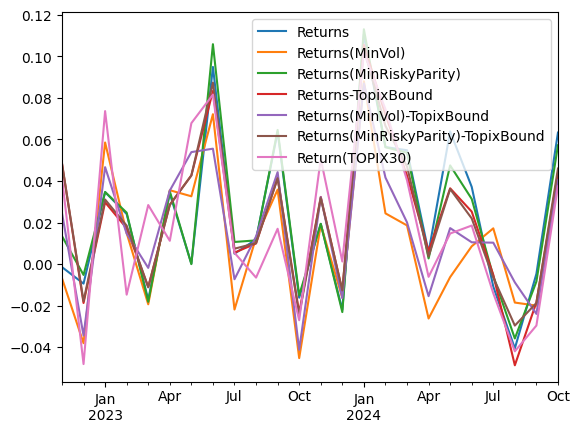

In [ ]:
df_opt_monthlyend_returns_with_topix30.plot()

<Axes: ylabel='Returns'>

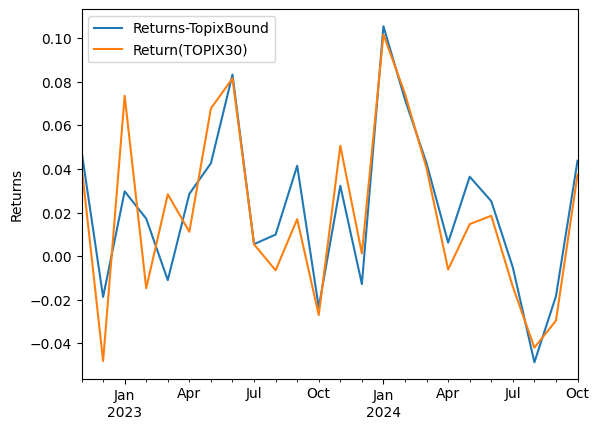

In [ ]:
df_opt_monthlyend_returns_with_topix30['Returns-TopixBound'].plot(legend=True, ylabel='Returns')
df_opt_monthlyend_returns_with_topix30['Return(TOPIX30)'].plot(legend=True)

<Axes: ylabel='Returns'>

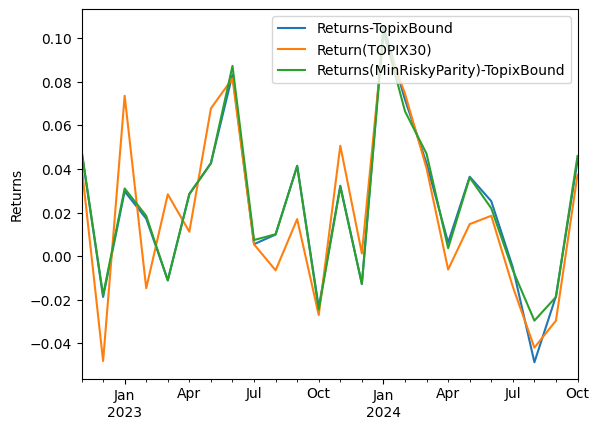

In [ ]:
df_opt_monthlyend_returns_with_topix30['Returns-TopixBound'].plot(legend=True, ylabel='Returns')
df_opt_monthlyend_returns_with_topix30['Return(TOPIX30)'].plot(legend=True)
df_opt_monthlyend_returns_with_topix30['Returns(MinRiskyParity)-TopixBound'].plot(legend=True, ylabel='Returns')


<Axes: ylabel='Returns'>

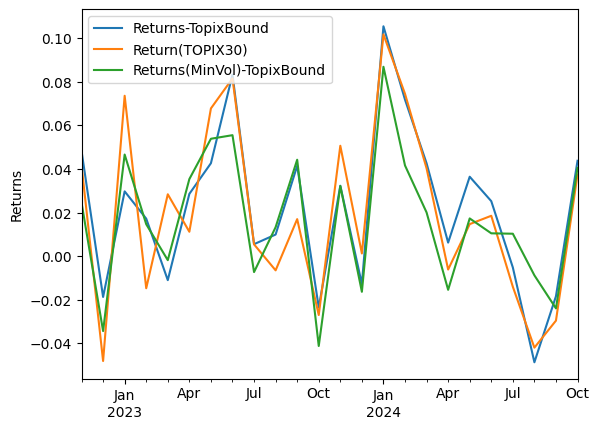

In [ ]:
df_opt_monthlyend_returns_with_topix30['Returns-TopixBound'].plot(legend=True, ylabel='Returns')
df_opt_monthlyend_returns_with_topix30['Return(TOPIX30)'].plot(legend=True)
df_opt_monthlyend_returns_with_topix30['Returns(MinVol)-TopixBound'].plot(legend=True, ylabel='Returns')

<Axes: ylabel='Returns'>

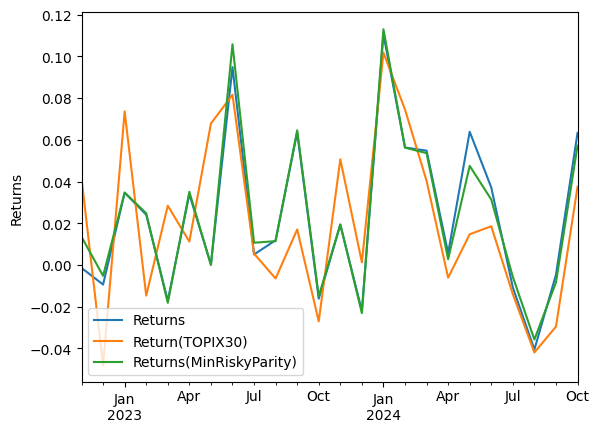

In [ ]:
df_opt_monthlyend_returns_with_topix30['Returns'].plot(legend=True, ylabel='Returns')
df_opt_monthlyend_returns_with_topix30['Return(TOPIX30)'].plot(legend=True)
df_opt_monthlyend_returns_with_topix30['Returns(MinRiskyParity)'].plot(legend=True, ylabel='Returns')


<Axes: ylabel='Returns'>

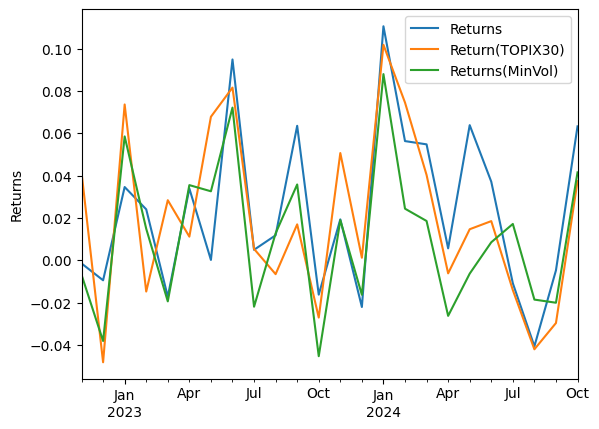

In [ ]:
df_opt_monthlyend_returns_with_topix30['Returns'].plot(legend=True, ylabel='Returns')
df_opt_monthlyend_returns_with_topix30['Return(TOPIX30)'].plot(legend=True)
df_opt_monthlyend_returns_with_topix30['Returns(MinVol)'].plot(legend=True, ylabel='Returns')

In [ ]:
(df_opt_monthlyend_returns_with_topix30 + 1).prod() - 1

Returns                               0.706463
Returns(MinVol)                       0.279842
Returns(MinRiskyParity)               0.729420
Returns-TopixBound                    0.669557
Returns(MinVol)-TopixBound            0.468692
Returns(MinRiskyParity)-TopixBound    0.701894
Return(TOPIX30)                       0.576034
dtype: float64

*   for the opt cases, the effective frontiers are plotted for the last months
*   for the top 5 and last 5 stocks, check the followings
    1.   annualized volatility
    2.   annualized return
    3.   sharp ratio



In [ ]:
last_date = monthly_returns.index[-1]

# Slice historical returns up to the last date
historical_returns = monthly_returns.loc[:last_date]

# Calculate the covariance matrix for the historical returns
cov_matrix = historical_returns.cov()

# Calculate expected returns by annualizing the historical returns
expected_returns = annualize_rets(historical_returns)

## Normal bound (0, 1)

In [ ]:
last_date

Timestamp('2024-10-31 00:00:00')

In [ ]:
bound = (0, 1)

w_risky = min_risk_parity(risk_free_rate, expected_returns, cov_matrix, bound)
w_vol = min_volatility(risk_free_rate, expected_returns, cov_matrix, bound)
w_msr = msr(risk_free_rate, expected_returns, cov_matrix, bound)

In [ ]:
risky_vol = portfolio_vol(w_risky, cov_matrix)
w_risky_vol_max_ret = maximize_return(risky_vol, expected_returns, cov_matrix, bound)

In [ ]:
portfolio_return(w_risky_vol_max_ret, expected_returns)

0.36793863410985017

In [ ]:
portfolio_vol(w_risky_vol_max_ret, cov_matrix)

0.03173415322472844

In [ ]:
last_optimized_weights_df = pd.DataFrame(
    [w_msr],
    index=[last_date],
    columns=monthly_returns.columns
)

# Normalize weights to ensure they sum to 100% for visualization
last_optimized_weights_df = last_optimized_weights_df.div(last_optimized_weights_df.sum(axis=1), axis=0) * 100
plot_optimized_weight_evolution_with_slider_Top10(last_optimized_weights_df)

In [ ]:
last_optimized_weights_rvmr_df = pd.DataFrame(
    [w_risky_vol_max_ret],
    index=[last_date],
    columns=monthly_returns.columns
)

# Normalize weights to ensure they sum to 100% for visualization
last_optimized_weights_rvmr_df = last_optimized_weights_rvmr_df.div(last_optimized_weights_rvmr_df.sum(axis=1), axis=0) * 100
plot_optimized_weight_evolution_with_slider(last_optimized_weights_rvmr_df)

In [ ]:
weight_dict = {'Weight': w_msr, 'Weight(Min Vol)': w_vol, 'Weight(Min Risky)': w_risky_vol_max_ret}
df_weights = pd.DataFrame(weight_dict, index=monthly_returns.columns)
df_weights.head()

Weight  Weight(Min Vol)  \
Astellas Pharma Inc.            0.000000e+00         0.084853   
Daiichi Sankyo Company,Limited  0.000000e+00         0.000000   
Daikin Industries,Ltd.          0.000000e+00         0.073151   
Fanuc Corporation               9.179298e-14         0.023404   
Hitachi,Ltd.                    3.448910e-01         0.083077   

                                Weight(Min Risky)  
Astellas Pharma Inc.                 2.852823e-16  
Daiichi Sankyo Company,Limited       0.000000e+00  
Daikin Industries,Ltd.               1.732479e-16  
Fanuc Corporation                    0.000000e+00  
Hitachi,Ltd.                         2.865651e-01

In [ ]:
weight_dict = {'Company': monthly_returns.columns, 'Weight': w_msr}
WeightVarSR_df = pd.DataFrame(weight_dict).sort_values(by=['Company'])
var_df_sort = var_df.sort_values(by=['Company'])
sr_df_sort = sr_df.sort_values(by=['Company'])
WeightVarSR_df['VaR'] = var_df_sort['VaR'].values
WeightVarSR_df['Sharp Ratio'] = sr_df_sort['Sharp Ratio'].values

WeightVarSR_df = WeightVarSR_df.sort_values(by=['Weight'], ascending=False)
WeightVarSR_df.head()

Company    Weight       VaR  \
4                                 Hitachi,Ltd.  0.344891 -0.030073   
25        Sumitomo Mitsui Financial Group,Inc.  0.263305 -0.022537   
17  Nippon Telegraph And Telephone Corporation  0.156220 -0.015719   
19                 Seven & I Holdings Co.,Ltd.  0.076661 -0.024528   
27                  Tokio Marine Holdings,Inc.  0.064335 -0.025228   

    Sharp Ratio  
4      1.782728  
25     1.730073  
17     0.917617  
19     0.741958  
27     1.348583

In [ ]:
WeightVarSR_df[WeightVarSR_df['Weight'] > 0.005]

Company    Weight       VaR  \
4                                 Hitachi,Ltd.  0.344891 -0.030073   
25        Sumitomo Mitsui Financial Group,Inc.  0.263305 -0.022537   
17  Nippon Telegraph And Telephone Corporation  0.156220 -0.015719   
19                 Seven & I Holdings Co.,Ltd.  0.076661 -0.024528   
27                  Tokio Marine Holdings,Inc.  0.064335 -0.025228   
22                              Softbank Corp.  0.059399 -0.012422   
6                             Hoya Corporation  0.035189 -0.032916   

    Sharp Ratio  
4      1.782728  
25     1.730073  
17     0.917617  
19     0.741958  
27     1.348583  
22     1.345615  
6      0.424409

In [ ]:
df_weights_sortw = df_weights['Weight'].sort_values(ascending=False)
df_weights_sortw = df_weights_sortw[df_weights_sortw > 0.01]
df_weights_sortw[:min(10, len(df_weights_sortw))]

Hitachi,Ltd.                                  0.344891
Sumitomo Mitsui Financial Group,Inc.          0.263305
Nippon Telegraph And Telephone Corporation    0.156220
Seven & I Holdings Co.,Ltd.                   0.076661
Tokio Marine Holdings,Inc.                    0.064335
Softbank Corp.                                0.059399
Hoya Corporation                              0.035189
Name: Weight, dtype: float64

In [ ]:
sr_df[sr_df['Company'].isin(df_weights_sortw.index)]

Company  Sharp Ratio  Annalize Return  \
16                            Hoya Corporation     0.424409         0.151536   
0                  Seven & I Holdings Co.,Ltd.     0.741958         0.225402   
26  Nippon Telegraph And Telephone Corporation     0.917617         0.172874   
28                              Softbank Corp.     1.345615         0.369699   
25                  Tokio Marine Holdings,Inc.     1.348583         0.432578   
23        Sumitomo Mitsui Financial Group,Inc.     1.730073         0.484919   
8                                 Hitachi,Ltd.     1.782728         0.608992   

    Annalize Volatility  
16             0.333490  
0              0.290315  
26             0.177497  
28             0.267312  
25             0.313350  
23             0.274508  
8              0.335997

In [ ]:
df_minweights = df_weights[df_weights['Weight'] < 0.0001]
sr_df[sr_df['Company'].isin(df_minweights.index)]

Company  Sharp Ratio  Annalize Return  \
9                       Nidec Corporation    -0.354987        -0.105618   
7                  Daikin Industries,Ltd.    -0.051040        -0.006207   
12                      Fanuc Corporation    -0.027474         0.001668   
6                         Smc Corporation     0.153925         0.058128   
13          Murata Manufacturing Co.,Ltd.     0.155903         0.056421   
29                   Softbank Group Corp.     0.221538         0.103162   
11                    Keyence Corporation     0.282754         0.102674   
3                    Astellas Pharma Inc.     0.326657         0.090791   
17                      Nintendo Co.,Ltd.     0.409407         0.125370   
4          Daiichi Sankyo Company,Limited     0.422522         0.167315   
10                 Sony Group Corporation     0.448704         0.150055   
2   Takeda Pharmaceutical Company Limited     0.594261         0.119309   
5               Recruit Holdings Co.,Ltd.     0.622136         0.243182   
1             Shin-Etsu Chemical Co.,Ltd.     0.681679         0.221962   
20                 Tokyo Electron Limited     0.717025         0.307538   
15                   Honda Motor Co.,Ltd.     0.720685         0.224761   
14               Toyota Motor Corporation     0.727857         0.221962   
27                       Kddi Corporation     0.899426         0.177423   
24            Mizuho Financial Group,Inc.     1.148163         0.317302   
18                     Itochu Corporation     1.387653         0.372276   
19                      Mitsui & Co.,Ltd.     1.421977         0.461467   
21                 Mitsubishi Corporation     1.540621         0.442216   
22    Mitsubishi Ufj Financial Group,Inc.     1.593442         0.471354   

    Annalize Volatility  
9              0.325697  
7              0.317539  
12             0.303268  
6              0.312674  
13             0.297757  
29             0.420525  
11             0.327756  
3              0.247328  
17             0.281798  
4              0.372324  
10             0.312132  
2              0.183940  
5              0.374809  
1              0.310942  
20             0.414961  
15             0.297995  
14             0.291213  
27             0.186145  
24             0.267647  
18             0.261071  
19             0.317492  
21             0.280546  
22             0.289533

In [ ]:
var_df[var_df['Company'].isin(df_weights_sortw.index)]

Company       VaR
16                            Hoya Corporation -0.032916
8                                 Hitachi,Ltd. -0.030073
25                  Tokio Marine Holdings,Inc. -0.025228
0                  Seven & I Holdings Co.,Ltd. -0.024528
23        Sumitomo Mitsui Financial Group,Inc. -0.022537
26  Nippon Telegraph And Telephone Corporation -0.015719
28                              Softbank Corp. -0.012422

In [ ]:
var_df[var_df['Company'].isin(df_minweights.index)]

Company       VaR
20                 Tokyo Electron Limited -0.040545
29                   Softbank Group Corp. -0.039286
5               Recruit Holdings Co.,Ltd. -0.033973
4          Daiichi Sankyo Company,Limited -0.032472
7                  Daikin Industries,Ltd. -0.032019
9                       Nidec Corporation -0.031699
6                         Smc Corporation -0.030063
11                    Keyence Corporation -0.029884
12                      Fanuc Corporation -0.029476
14               Toyota Motor Corporation -0.028961
19                      Mitsui & Co.,Ltd. -0.028648
15                   Honda Motor Co.,Ltd. -0.028035
13          Murata Manufacturing Co.,Ltd. -0.027912
1             Shin-Etsu Chemical Co.,Ltd. -0.027804
10                 Sony Group Corporation -0.027576
21                 Mitsubishi Corporation -0.024543
17                      Nintendo Co.,Ltd. -0.023456
3                    Astellas Pharma Inc. -0.022992
22    Mitsubishi Ufj Financial Group,Inc. -0.022817
18                     Itochu Corporation -0.022763
24            Mizuho Financial Group,Inc. -0.022085
27                       Kddi Corporation -0.017646
2   Takeda Pharmaceutical Company Limited -0.016388

In [ ]:
# Plot the Efficient Frontier with the CML
plot_efficient_frontier_with_cml(expected_returns, cov_matrix, bound=(0, 1), riskfree_rate=0.01, is_risky_parity=True, is_min_vol=True)

## Bound = (0.008, 0.1)

In [ ]:
bound = (0.008, 0.1)

w_risky = min_risk_parity(risk_free_rate, expected_returns, cov_matrix, bound)
w_vol = min_volatility(risk_free_rate, expected_returns, cov_matrix, bound)
w_msr = msr(risk_free_rate, expected_returns, cov_matrix, bound)

risky_vol = portfolio_vol(w_risky, cov_matrix)
w_risky_vol_max_ret = maximize_return(risky_vol, expected_returns, cov_matrix, bound)

last_optimized_weights_df = pd.DataFrame(
    [w_msr],
    index=[last_date],
    columns=monthly_returns.columns
)

# Normalize weights to ensure they sum to 100% for visualization
last_optimized_weights_df = last_optimized_weights_df.div(last_optimized_weights_df.sum(axis=1), axis=0) * 100
plot_optimized_weight_evolution_with_slider(last_optimized_weights_df)

In [ ]:
last_optimized_weights_rvmr_df = pd.DataFrame(
    [w_risky_vol_max_ret],
    index=[last_date],
    columns=monthly_returns.columns
)

# Normalize weights to ensure they sum to 100% for visualization
last_optimized_weights_rvmr_df = last_optimized_weights_rvmr_df.div(last_optimized_weights_rvmr_df.sum(axis=1), axis=0) * 100
plot_optimized_weight_evolution_with_slider(last_optimized_weights_rvmr_df)

In [ ]:
weight_dict = {'Weight': w_msr, 'Company': monthly_returns.columns}
WeightVarSR_df = pd.DataFrame(weight_dict).sort_values(by=['Company'])
var_df_sort = var_df.sort_values(by=['Company'])
sr_df_sort = sr_df.sort_values(by=['Company'])
WeightVarSR_df['VaR'] = var_df_sort['VaR'].values
WeightVarSR_df['Sharp Ratio'] = sr_df_sort['Sharp Ratio'].values

WeightVarSR_df = WeightVarSR_df.sort_values(by=['Weight'], ascending=False)
WeightVarSR_df.head()

Weight                               Company       VaR  Sharp Ratio
22     0.1                        Softbank Corp. -0.012422     1.345615
27     0.1            Tokio Marine Holdings,Inc. -0.025228     1.348583
25     0.1  Sumitomo Mitsui Financial Group,Inc. -0.022537     1.730073
19     0.1           Seven & I Holdings Co.,Ltd. -0.024528     0.741958
4      0.1                          Hitachi,Ltd. -0.030073     1.782728

In [ ]:
WeightVarSR_dfw = WeightVarSR_df[WeightVarSR_df['Weight'] > 0.005]
WeightVarSR_dfw[:min(10, len(WeightVarSR_dfw))]

Weight                                     Company       VaR  \
22  0.100000                              Softbank Corp. -0.012422   
27  0.100000                  Tokio Marine Holdings,Inc. -0.025228   
25  0.100000        Sumitomo Mitsui Financial Group,Inc. -0.022537   
19  0.100000                 Seven & I Holdings Co.,Ltd. -0.024528   
4   0.100000                                Hitachi,Ltd. -0.030073   
17  0.098408  Nippon Telegraph And Telephone Corporation -0.015719   
12  0.080987                           Mitsui & Co.,Ltd. -0.028648   
13  0.077889                 Mizuho Financial Group,Inc. -0.022085   
6   0.052463                            Hoya Corporation -0.032916   
7   0.030252                          Itochu Corporation -0.022763   

    Sharp Ratio  
22     1.345615  
27     1.348583  
25     1.730073  
19     0.741958  
4      1.782728  
17     0.917617  
12     1.421977  
13     1.148163  
6      0.424409  
7      1.387653

In [ ]:
weight_dict = {'Weight': w_msr, 'Weight(Min Vol)': w_vol, 'Weight(Min Risky)': w_risky}
df_weights = pd.DataFrame(weight_dict, index=monthly_returns.columns)
df_weights.head()

Weight  Weight(Min Vol)  Weight(Min Risky)
Astellas Pharma Inc.             0.008         0.100000           0.060844
Daiichi Sankyo Company,Limited   0.008         0.008000           0.031305
Daikin Industries,Ltd.           0.008         0.087830           0.036997
Fanuc Corporation                0.008         0.020210           0.032766
Hitachi,Ltd.                     0.100         0.050872           0.030613

In [ ]:
df_weights_sortw = df_weights['Weight'].sort_values(ascending=False)
df_weights_sortw = df_weights_sortw[df_weights_sortw > 0.01]
df_weights_sortw[:min(10, len(df_weights_sortw))]

Softbank Corp.                                0.100000
Tokio Marine Holdings,Inc.                    0.100000
Sumitomo Mitsui Financial Group,Inc.          0.100000
Seven & I Holdings Co.,Ltd.                   0.100000
Hitachi,Ltd.                                  0.100000
Nippon Telegraph And Telephone Corporation    0.098408
Mitsui & Co.,Ltd.                             0.080987
Mizuho Financial Group,Inc.                   0.077889
Hoya Corporation                              0.052463
Itochu Corporation                            0.030252
Name: Weight, dtype: float64

In [ ]:
sr_df[sr_df['Company'].isin(df_weights_sortw.index)]

Company  Sharp Ratio  Annalize Return  \
16                            Hoya Corporation     0.424409         0.151536   
0                  Seven & I Holdings Co.,Ltd.     0.741958         0.225402   
26  Nippon Telegraph And Telephone Corporation     0.917617         0.172874   
24                 Mizuho Financial Group,Inc.     1.148163         0.317302   
28                              Softbank Corp.     1.345615         0.369699   
25                  Tokio Marine Holdings,Inc.     1.348583         0.432578   
18                          Itochu Corporation     1.387653         0.372276   
19                           Mitsui & Co.,Ltd.     1.421977         0.461467   
23        Sumitomo Mitsui Financial Group,Inc.     1.730073         0.484919   
8                                 Hitachi,Ltd.     1.782728         0.608992   

    Annalize Volatility  
16             0.333490  
0              0.290315  
26             0.177497  
24             0.267647  
28             0.267312  
25             0.313350  
18             0.261071  
19             0.317492  
23             0.274508  
8              0.335997

In [ ]:
df_minweights = df_weights[df_weights['Weight'] < 0.0081]
sr_df[sr_df['Company'].isin(df_minweights.index)]

Company  Sharp Ratio  Annalize Return  \
9                       Nidec Corporation    -0.354987        -0.105618   
7                  Daikin Industries,Ltd.    -0.051040        -0.006207   
12                      Fanuc Corporation    -0.027474         0.001668   
6                         Smc Corporation     0.153925         0.058128   
13          Murata Manufacturing Co.,Ltd.     0.155903         0.056421   
29                   Softbank Group Corp.     0.221538         0.103162   
11                    Keyence Corporation     0.282754         0.102674   
3                    Astellas Pharma Inc.     0.326657         0.090791   
17                      Nintendo Co.,Ltd.     0.409407         0.125370   
4          Daiichi Sankyo Company,Limited     0.422522         0.167315   
10                 Sony Group Corporation     0.448704         0.150055   
2   Takeda Pharmaceutical Company Limited     0.594261         0.119309   
5               Recruit Holdings Co.,Ltd.     0.622136         0.243182   
1             Shin-Etsu Chemical Co.,Ltd.     0.681679         0.221962   
20                 Tokyo Electron Limited     0.717025         0.307538   
15                   Honda Motor Co.,Ltd.     0.720685         0.224761   
14               Toyota Motor Corporation     0.727857         0.221962   
27                       Kddi Corporation     0.899426         0.177423   
21                 Mitsubishi Corporation     1.540621         0.442216   
22    Mitsubishi Ufj Financial Group,Inc.     1.593442         0.471354   

    Annalize Volatility  
9              0.325697  
7              0.317539  
12             0.303268  
6              0.312674  
13             0.297757  
29             0.420525  
11             0.327756  
3              0.247328  
17             0.281798  
4              0.372324  
10             0.312132  
2              0.183940  
5              0.374809  
1              0.310942  
20             0.414961  
15             0.297995  
14             0.291213  
27             0.186145  
21             0.280546  
22             0.289533

In [ ]:
var_df[var_df['Company'].isin(df_weights_sortw.index)]

Company       VaR
16                            Hoya Corporation -0.032916
8                                 Hitachi,Ltd. -0.030073
19                           Mitsui & Co.,Ltd. -0.028648
25                  Tokio Marine Holdings,Inc. -0.025228
0                  Seven & I Holdings Co.,Ltd. -0.024528
18                          Itochu Corporation -0.022763
23        Sumitomo Mitsui Financial Group,Inc. -0.022537
24                 Mizuho Financial Group,Inc. -0.022085
26  Nippon Telegraph And Telephone Corporation -0.015719
28                              Softbank Corp. -0.012422

In [ ]:
# Plot the Efficient Frontier with the CML
plot_efficient_frontier_with_cml(expected_returns, cov_matrix, bound=(0.008, 0.1), riskfree_rate=0.01, is_risky_parity=True, is_min_vol=True)

## Backtesting and Long Short Leverage

reference for understanding the gross exposure limit:
https://poe.com/s/BSrHcSZM9TWPOM7yElfj

In [ ]:
def msr_long_short(riskfree_rate, ret, covmat, bound=(0.008, 0.1)):
    """Finds the portfolio weights that maximize the Sharpe Ratio."""
    n = ret.shape[0]
    init_guess = np.repeat(1 / n, n)
    bounds = (bound,) * n # each asset
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    gross_exposure_limit = 2.0

    gross_exposure_constraint = {'type': 'ineq', 'fun': lambda weights: gross_exposure_limit - np.sum(np.abs(weights))}

    def neg_sharpe(weights, riskfree_rate, er, cov):
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate) / vol #negative for optimizing

    weights = minimize(neg_sharpe, init_guess, args=(riskfree_rate, ret, covmat),
                       method='SLSQP', options={'disp': False},
                       constraints=(weights_sum_to_1, gross_exposure_constraint),
                       bounds=bounds)
    return weights.x

def minimize_vol_long_short(target_return, ret, cov, bound=(0.008, 0.1),gross_exposure_limit=2.0):
    """Finds the weights that minimize volatility for a target return."""
    n = ret.shape[0]
    init_guess = np.repeat(1 / n, n)
    bounds = (bound,) * n # each asset
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    return_is_target = {'type': 'eq', 'args': (ret,),
                        'fun': lambda weights, ret: target_return - portfolio_return(weights, ret)}
    gross_exposure_constraint = {'type': 'ineq', 'fun': lambda weights: gross_exposure_limit - np.sum(np.abs(weights))}

    weights = minimize(portfolio_vol, init_guess, args=(cov,), method='SLSQP',
                       options={'disp': False}, constraints=(weights_sum_to_1, return_is_target, gross_exposure_constraint),
                       bounds=bounds)
    return weights.x

def minimize_vol_long_short_without_target(ret, cov, bound=(-1, 1),gross_exposure_limit=2.0):
    """Finds the weights that minimize volatility."""
    n = ret.shape[0]
    init_guess = np.repeat(1 / n, n)
    bounds = (bound,) * n # each asset
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    gross_exposure_constraint = {'type': 'ineq', 'fun': lambda weights: gross_exposure_limit - np.sum(np.abs(weights))}

    weights = minimize(portfolio_vol, init_guess, args=(cov,), method='SLSQP',
                       options={'disp': False}, constraints=(weights_sum_to_1, gross_exposure_constraint),
                       bounds=bounds)
    return weights.x

In [ ]:
def plot_efficient_frontier_with_cml_long_short(ret, cov, bound=(0.008, 0.1), ls_bound=(-0.1, 0.1),
                                                riskfree_rate=0,gross_exposure_limit=2.0):
    """Plots the entire efficient frontier with the CML and marks the tangent portfolio."""
    gross_exposure_limit = gross_exposure_limit
    n_points = 100
    # Extend the range of target returns to 1.5x the maximum expected return
    target_returns = np.linspace(ret.min(), ret.max() * 1.5, n_points)
    print(target_returns)
    print(len(target_returns))
    weights = [minimize_vol(target_return, ret, cov, bound) for target_return in target_returns] # 30 stocks, 30 weights for hundred returns
    vols = [portfolio_vol(w, cov) for w in weights]
    rets = [portfolio_return(w, ret) for w in weights]

    weights_long_short = [minimize_vol_long_short(target_return, ret, cov, ls_bound,gross_exposure_limit) for target_return in target_returns]
    vols_long_short = [portfolio_vol(w, cov) for w in weights_long_short]
    rets_long_short = [portfolio_return(w, ret) for w in weights_long_short]

    # Calculate Sharpe ratio-maximized portfolio (MSR)
    weights_msr = msr(riskfree_rate, ret, cov, bound) # 30 stocks, 30 weights for having the best Sharpe ratio
    r_msr = portfolio_return(weights_msr, ret) # return with the best sharpe ratio
    vol_msr = portfolio_vol(weights_msr, cov) # volatility

    weights_msr_long_short = msr_long_short(riskfree_rate, ret, cov, ls_bound) # long sharpe part
    r_msr_long_short = portfolio_return(weights_msr_long_short, ret)
    vol_msr_long_short = portfolio_vol(weights_msr_long_short, cov)

    # Plot efficient frontier
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=vols, y=rets, mode='lines+markers', name='Efficient Frontier'))
    fig.add_trace(go.Scatter(x=vols_long_short, y=rets_long_short, mode='lines+markers', name='Efficient Frontier (Long Short)'))

    # Add CML
    fig.add_trace(go.Scatter(
        x=[0, vol_msr], y=[riskfree_rate, r_msr],
        mode='lines',
        name='Capital Market Line (CML)',
        line=dict(dash='dash', color='green')
    ))

    # Add tangent portfolio point
    fig.add_trace(go.Scatter(
        x=[vol_msr], y=[r_msr],
        mode='markers',
        name='Tangent Portfolio',
        marker=dict(color='red', size=10, symbol='circle')
    ))

    fig.add_trace(go.Scatter(
        x=[0, vol_msr_long_short], y=[riskfree_rate, r_msr_long_short],
        mode='lines',
        name='Capital Market Line (CML-Long Short)',
        line=dict(dash='dash', color='#00CC96')
    ))

    # Add tangent portfolio point
    fig.add_trace(go.Scatter(
        x=[vol_msr_long_short], y=[r_msr_long_short],
        mode='markers',
        name='Tangent Portfolio (Long Short)',
        marker=dict(color='#D62728', size=10, symbol='circle')
    ))

    fig.update_layout(
        title="Efficient Frontier with CML",
        xaxis_title="Volatility",
        yaxis_title="Returns"
    )
    fig.show()

    return (weights, weights_long_short, weights_msr, weights_msr_long_short)

In [ ]:
expected_returns # monthly return -> expected return

Astellas Pharma Inc.                          0.084162
Daiichi Sankyo Company,Limited                0.091508
Daikin Industries,Ltd.                       -0.048369
Fanuc Corporation                            -0.031302
Hitachi,Ltd.                                  0.553743
Honda Motor Co.,Ltd.                          0.182953
Hoya Corporation                              0.112061
Itochu Corporation                            0.339995
Kddi Corporation                              0.169433
Keyence Corporation                           0.073756
Mitsubishi Corporation                        0.427889
Mitsubishi Ufj Financial Group,Inc.           0.443297
Mitsui & Co.,Ltd.                             0.434749
Mizuho Financial Group,Inc.                   0.313364
Murata Manufacturing Co.,Ltd.                -0.007719
Nidec Corporation                            -0.154675
Nintendo Co.,Ltd.                             0.115984
Nippon Telegraph And Telephone Corporation    0.145104
Recruit Holdings Co.,Ltd.                     0.222174
Seven & I Holdings Co.,Ltd.                   0.217820
Shin-Etsu Chemical Co.,Ltd.                   0.162393
Smc Corporation                               0.014129
Softbank Corp.                                0.348915
Softbank Group Corp.                          0.079196
Sony Group Corporation                        0.119227
Sumitomo Mitsui Financial Group,Inc.          0.471095
Takeda Pharmaceutical Company Limited         0.081867
Tokio Marine Holdings,Inc.                    0.397305
Tokyo Electron Limited                        0.226575
Toyota Motor Corporation                      0.217499
dtype: float64

In [ ]:
weights_tuple1 = plot_efficient_frontier_with_cml_long_short(ret=expected_returns, cov=cov_matrix, bound=(0, 1), ls_bound=(-0.5, 0.5), riskfree_rate=0.01)

[-0.15467472 -0.1447223  -0.13476987 -0.12481745 -0.11486503 -0.1049126
 -0.09496018 -0.08500776 -0.07505533 -0.06510291 -0.05515049 -0.04519806
 -0.03524564 -0.02529322 -0.01534079 -0.00538837  0.00456405  0.01451647
  0.0244689   0.03442132  0.04437374  0.05432617  0.06427859  0.07423101
  0.08418344  0.09413586  0.10408828  0.11404071  0.12399313  0.13394555
  0.14389798  0.1538504   0.16380282  0.17375524  0.18370767  0.19366009
  0.20361251  0.21356494  0.22351736  0.23346978  0.24342221  0.25337463
  0.26332705  0.27327948  0.2832319   0.29318432  0.30313675  0.31308917
  0.32304159  0.33299401  0.34294644  0.35289886  0.36285128  0.37280371
  0.38275613  0.39270855  0.40266098  0.4126134   0.42256582  0.43251825
  0.44247067  0.45242309  0.46237552  0.47232794  0.48228036  0.49223278
  0.50218521  0.51213763  0.52209005  0.53204248  0.5419949   0.55194732
  0.56189975  0.57185217  0.58180459  0.59175702  0.60170944  0.61166186
  0.62161429  0.63156671  0.64151913  0.65147155  0.

In [ ]:
print(weights_tuple1[1])

[array([ 1.24698210e-01, -2.81500824e-06,  1.10937520e-01,  1.21559482e-01,
       -1.97372883e-01,  3.00765131e-06,  2.14582534e-07, -1.17842083e-01,
        2.32573787e-09,  7.40932627e-06, -9.93248576e-02, -2.99974125e-05,
        3.82522638e-06,  1.13526417e-05,  5.11843842e-06,  2.13076984e-01,
        3.04823962e-03,  3.07074956e-01, -2.28259129e-04,  6.47253977e-02,
       -3.07341154e-06,  2.56190609e-06,  2.27823766e-06,  1.29128315e-01,
        1.08842638e-01, -8.16686884e-02,  3.16903189e-01, -6.05318479e-06,
       -3.54656217e-03, -5.42956336e-06]), array([ 1.18152008e-01, -1.56688505e-06,  1.12034301e-01,  1.18433576e-01,
       -1.81884553e-01, -6.18980880e-07,  3.43337798e-07, -1.36261335e-01,
        2.31920234e-06,  7.68874054e-03, -8.98243964e-02, -5.56878336e-07,
       -4.72725307e-07,  4.37896757e-06,  1.58594160e-06,  2.03632737e-01,
        1.19696287e-02,  3.04940279e-01, -1.78802403e-03,  6.98586160e-02,
        2.17980235e-07,  2.66040602e-06,  1.47379843e-06

In [ ]:
weights_tuple2 = plot_efficient_frontier_with_cml_long_short(ret=expected_returns, cov=cov_matrix, bound=(0, 1), ls_bound=(-1, 1), riskfree_rate=0.01)

[-0.15467472 -0.1447223  -0.13476987 -0.12481745 -0.11486503 -0.1049126
 -0.09496018 -0.08500776 -0.07505533 -0.06510291 -0.05515049 -0.04519806
 -0.03524564 -0.02529322 -0.01534079 -0.00538837  0.00456405  0.01451647
  0.0244689   0.03442132  0.04437374  0.05432617  0.06427859  0.07423101
  0.08418344  0.09413586  0.10408828  0.11404071  0.12399313  0.13394555
  0.14389798  0.1538504   0.16380282  0.17375524  0.18370767  0.19366009
  0.20361251  0.21356494  0.22351736  0.23346978  0.24342221  0.25337463
  0.26332705  0.27327948  0.2832319   0.29318432  0.30313675  0.31308917
  0.32304159  0.33299401  0.34294644  0.35289886  0.36285128  0.37280371
  0.38275613  0.39270855  0.40266098  0.4126134   0.42256582  0.43251825
  0.44247067  0.45242309  0.46237552  0.47232794  0.48228036  0.49223278
  0.50218521  0.51213763  0.52209005  0.53204248  0.5419949   0.55194732
  0.56189975  0.57185217  0.58180459  0.59175702  0.60170944  0.61166186
  0.62161429  0.63156671  0.64151913  0.65147155  0.

In [ ]:
weights_tuple3 = plot_efficient_frontier_with_cml_long_short(ret=expected_returns, cov=cov_matrix, bound=(0, 1), ls_bound=(-0.1, 0.1), riskfree_rate=0.01,gross_exposure_limit=2.0)

[-0.15467472 -0.1447223  -0.13476987 -0.12481745 -0.11486503 -0.1049126
 -0.09496018 -0.08500776 -0.07505533 -0.06510291 -0.05515049 -0.04519806
 -0.03524564 -0.02529322 -0.01534079 -0.00538837  0.00456405  0.01451647
  0.0244689   0.03442132  0.04437374  0.05432617  0.06427859  0.07423101
  0.08418344  0.09413586  0.10408828  0.11404071  0.12399313  0.13394555
  0.14389798  0.1538504   0.16380282  0.17375524  0.18370767  0.19366009
  0.20361251  0.21356494  0.22351736  0.23346978  0.24342221  0.25337463
  0.26332705  0.27327948  0.2832319   0.29318432  0.30313675  0.31308917
  0.32304159  0.33299401  0.34294644  0.35289886  0.36285128  0.37280371
  0.38275613  0.39270855  0.40266098  0.4126134   0.42256582  0.43251825
  0.44247067  0.45242309  0.46237552  0.47232794  0.48228036  0.49223278
  0.50218521  0.51213763  0.52209005  0.53204248  0.5419949   0.55194732
  0.56189975  0.57185217  0.58180459  0.59175702  0.60170944  0.61166186
  0.62161429  0.63156671  0.64151913  0.65147155  0.

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr

In [ ]:
weights_tuple4 = plot_efficient_frontier_with_cml_long_short(ret=expected_returns, cov=cov_matrix, bound=(0, 1), ls_bound=(-0.4, 1), riskfree_rate=0.01)

[-0.15467472 -0.1447223  -0.13476987 -0.12481745 -0.11486503 -0.1049126
 -0.09496018 -0.08500776 -0.07505533 -0.06510291 -0.05515049 -0.04519806
 -0.03524564 -0.02529322 -0.01534079 -0.00538837  0.00456405  0.01451647
  0.0244689   0.03442132  0.04437374  0.05432617  0.06427859  0.07423101
  0.08418344  0.09413586  0.10408828  0.11404071  0.12399313  0.13394555
  0.14389798  0.1538504   0.16380282  0.17375524  0.18370767  0.19366009
  0.20361251  0.21356494  0.22351736  0.23346978  0.24342221  0.25337463
  0.26332705  0.27327948  0.2832319   0.29318432  0.30313675  0.31308917
  0.32304159  0.33299401  0.34294644  0.35289886  0.36285128  0.37280371
  0.38275613  0.39270855  0.40266098  0.4126134   0.42256582  0.43251825
  0.44247067  0.45242309  0.46237552  0.47232794  0.48228036  0.49223278
  0.50218521  0.51213763  0.52209005  0.53204248  0.5419949   0.55194732
  0.56189975  0.57185217  0.58180459  0.59175702  0.60170944  0.61166186
  0.62161429  0.63156671  0.64151913  0.65147155  0.

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



In [ ]:
long_short_lowerbound = [-0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1]
opt_rets_long_short_diff_bounds = []
for ib in long_short_lowerbound:
  opt_rets_long_short=[]
  for i_date, date in enumerate(analysis_months):
    # Slice the returns data up to the current date
    historical_returns = monthly_returns.loc[:date]
    # Calculate the covariance matrix for the historical returns
    cov_matrix = historical_returns.cov()
    # Calculate expected returns by annualizing the historical returns
    expected_returns = annualize_rets(historical_returns)
    # print(expected_returns)
    # try bound = (-1,1)
    bound = (ib,1) # -0.4 has the greatest return so far but still lower the long only's
    w_vol_long_short = minimize_vol_long_short_without_target(expected_returns, cov_matrix,bound) # default gross_exposure_limit = 2.0
    w_msr_long_short = msr_long_short(risk_free_rate, expected_returns, cov_matrix,bound)
    if i_date + 1 == len(analysis_months):
      break
    next_date = analysis_months[i_date+1]
    if next_date in monthly_returns.index:
      opt_ret_long_short = portfolio_return(w_msr_long_short, monthly_returns.loc[next_date])
      opt_rets_long_short.append(opt_ret_long_short)
  opt_rets_long_short_diff_bounds.append(opt_rets_long_short)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning:

Values in x were outside boun

In [ ]:
opt_rets_long_short_diff_bounds[2]

[-0.008307743349468086,
 0.010907790228052515,
 0.08762339108124734,
 0.04504862635159007,
 -0.008914961197670188,
 0.0214171494798438,
 -0.02174288634241604,
 0.0582615377050989,
 -0.0301099528526948,
 0.012960745675204933,
 0.06698226132832945,
 0.015625014853754594,
 -0.0006533488330288306,
 -0.045688920527642216,
 0.13850119560180157,
 0.023420305790577894,
 0.05451863436658214,
 -0.012992954873764263,
 0.05307257246414442,
 0.03475559196209114,
 0.010238886245010688,
 -0.025684875673564065,
 0.0032305709409373093,
 0.042385438634793764]

In [ ]:
df_opt_monthlyend_returns_with_topix30_and_longshort = df_opt_monthlyend_returns_with_topix30.copy()
for i in range(len(long_short_lowerbound)):
  df_opt_monthlyend_returns_with_topix30_and_longshort['Return_long_short'+ ' (' + str(long_short_lowerbound[i])+',1)'] = opt_rets_long_short_diff_bounds[i]

In [ ]:
(df_opt_monthlyend_returns_with_topix30_and_longshort + 1).prod() - 1

Returns                               0.706463
Returns(MinVol)                       0.279842
Returns(MinRiskyParity)               0.729420
Returns-TopixBound                    0.669557
Returns(MinVol)-TopixBound            0.468692
Returns(MinRiskyParity)-TopixBound    0.701894
Return(TOPIX30)                       0.576034
Return_long_short (-0.1,1)            0.626639
Return_long_short (-0.2,1)            0.630660
Return_long_short (-0.3,1)            0.649249
Return_long_short (-0.4,1)            0.671429
Return_long_short (-0.5,1)            0.553127
Return_long_short (-0.6,1)            0.617076
Return_long_short (-0.7,1)            0.605228
Return_long_short (-0.8,1)            0.599281
Return_long_short (-0.9,1)            0.565797
Return_long_short (-1,1)              0.589210
dtype: float64

<Axes: ylabel='Returns'>

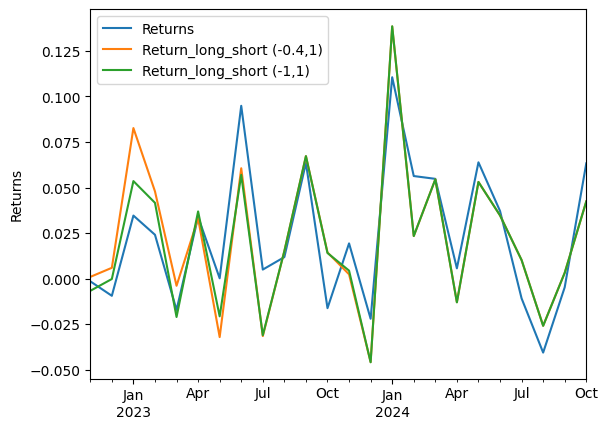

In [ ]:
df_opt_monthlyend_returns_with_topix30_and_longshort['Returns'].plot(legend=True, ylabel='Returns')
# df_opt_monthlyend_returns_with_topix30_and_longshort['Return(TOPIX30)'].plot(legend=True)
df_opt_monthlyend_returns_with_topix30_and_longshort['Return_long_short (-0.4,1)'].plot(legend=True, ylabel='Returns')
df_opt_monthlyend_returns_with_topix30_and_longshort['Return_long_short (-1,1)'].plot(legend=True, ylabel='Returns')

<Axes: >

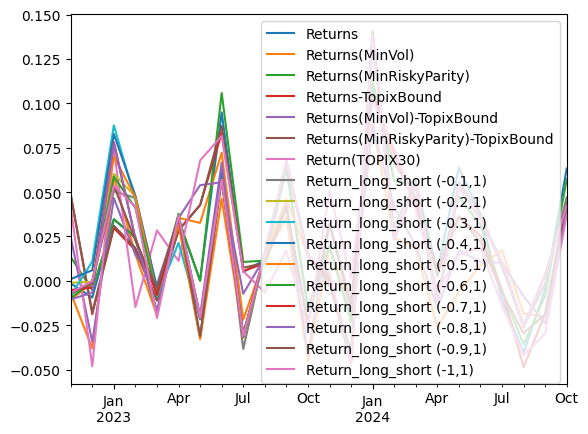

In [ ]:
df_opt_monthlyend_returns_with_topix30_and_longshort.plot()

In [ ]:
def calculate_rsi(data, window=14):
    delta1 = data["1311.T Price"].diff()
    # delta1 = delta.dropna()
    gain = (delta1.where(delta1 > 0, 0)).rolling(window=window).mean()
    loss = (-delta1.where(delta1 < 0, 0)).rolling(window=window).mean()
    rs = gain / loss.replace(0, np.nan)
    #print(rs)
    rsi = 100 - (100 / (1 + rs))
    print(type(rsi))
    print(len(rsi))
    return rsi

In [ ]:
actual_prices

Date  1311.T Price
0  2020-11-30    749.432068
1  2020-12-31    790.805908
2  2021-01-31    780.462463
3  2021-02-28    822.776672
4  2021-03-31    860.389404
5  2021-04-30    837.821716
6  2021-05-31    852.866821
7  2021-06-30    857.568420
8  2021-07-31    850.259583
9  2021-08-31    868.370483
10 2021-09-30    912.217957
11 2021-10-31    901.732666
12 2021-11-30    898.015137
13 2021-12-31    977.035950
14 2022-01-31    894.106995
15 2022-02-28    866.559326
16 2022-03-31    925.086243
17 2022-04-30    890.198914
18 2022-05-31    904.973633
19 2022-06-30    864.652954
20 2022-07-31    898.780945
21 2022-08-31    904.396545
22 2022-09-30    844.755310
23 2022-10-31    896.554077
24 2022-11-30    933.829834
25 2022-12-31    888.905273
26 2023-01-31    954.355713
27 2023-02-28    940.316833
28 2023-03-31    967.039124
29 2023-04-30    977.882996
30 2023-05-31   1044.204834
31 2023-06-30   1129.406494
32 2023-07-31   1135.541870
33 2023-08-31   1128.161865
34 2023-09-30   1147.349976
35 2023-10-31   1116.353760
36 2023-11-30   1172.934082
37 2023-12-31   1174.410034
38 2024-01-31   1293.966675
39 2024-02-29   1390.399170
40 2024-03-31   1446.487427
41 2024-04-30   1437.631470
42 2024-05-31   1458.787598
43 2024-06-30   1485.847656
44 2024-07-31   1465.000000
45 2024-08-31   1403.500000
46 2024-09-30   1362.000000
47 2024-10-31   1413.000000

In [ ]:
data = calculate_rsi(actual_prices)
bull_market_rsi = data > 70

<class 'pandas.core.series.Series'>
48


In [ ]:
print(bull_market_rsi)


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46    False
47     True
Name: 1311.T Price, dtype: bool


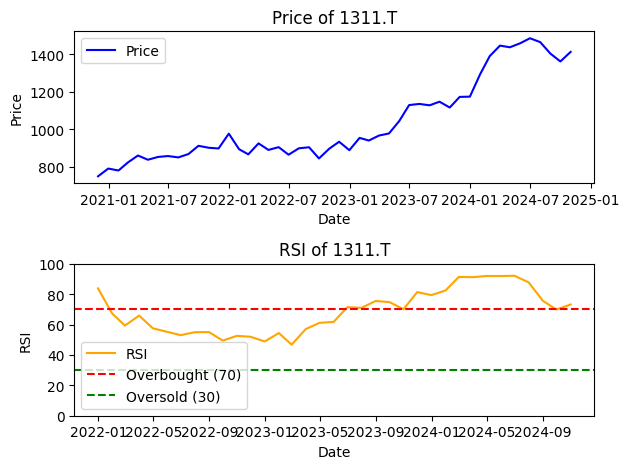

In [ ]:
# Plot price data
plt.subplot(2, 1, 1)
plt.plot(actual_prices['Date'], actual_prices["1311.T Price"], label='Price', color='blue')
plt.title('Price of 1311.T')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot RSI data
plt.subplot(2, 1, 2)
plt.plot(actual_prices['Date'], data, label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI of 1311.T')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.ylim(0, 100)  # RSI values range from 0 to 100

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
print(data)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13    83.824379
14    67.248733
15    59.339539
16    65.937006
17    57.553317
18    55.264144
19    53.040547
20    54.987340
21    55.076542
22    49.464099
23    52.575062
24    51.998623
25    48.884785
26    54.423438
27    46.789498
28    57.071825
29    61.155816
30    61.753331
31    71.470606
32    71.021177
33    75.559653
34    74.830166
35    70.151127
36    81.383159
37    79.400552
38    82.455511
39    91.355267
40    91.219691
41    92.018612
42    91.942828
43    92.159711
44    87.776417
45    75.700129
46    69.913036
47    73.262051
Name: 1311.T Price, dtype: float64


## **Others**

In [ ]:
def optimize_thresholds_improved(returns, initial_capital=100000, position_size=0.1, leverage=1,
                               threshold_range=(-0.15, 0.15), step=0.01):
    """
    Improved threshold optimization with:
    - Wider search range
    - Multiple starting points
    - Performance metrics beyond just final value
    """
    best_long_threshold = None
    best_short_threshold = None
    best_sharpe = -np.inf
    best_ret = None

    # Expand search range
    for long_threshold in np.arange(threshold_range[0], threshold_range[1], step):
        for short_threshold in np.arange(-threshold_range[1], -threshold_range[0], step):
            portfolio_value = backtest_long_short_improved(
                returns,
                initial_capital=initial_capital,
                position_size=position_size,
                leverage=leverage,
                long_threshold=long_threshold,
                short_threshold=short_threshold
            )

            # Calculate returns
            portfolio_returns = np.diff(portfolio_value) / portfolio_value[:-1]

            # Calculate Sharpe Ratio (or other metrics)
            sharpe_ratio = np.mean(portfolio_returns) / np.std(portfolio_returns) * np.sqrt(252)

            # Check if this is the best portfolio (using Sharpe instead of final value)
            if sharpe_ratio > best_sharpe:
                best_ret = portfolio_value
                best_sharpe = sharpe_ratio
                best_long_threshold = long_threshold
                best_short_threshold = short_threshold

    return best_long_threshold, best_short_threshold, best_sharpe, best_ret

# Additional validation function
def validate_strategy(returns, long_threshold, short_threshold,
                     initial_capital=100000, position_size=0.1, leverage=1):
    """
    Validate strategy with multiple metrics
    """
    portfolio_value = backtest_long_short_improved(
        returns,
        initial_capital=initial_capital,
        position_size=position_size,
        leverage=leverage,
        long_threshold=long_threshold,
        short_threshold=short_threshold
    )

    portfolio_returns = np.diff(portfolio_value) / portfolio_value[:-1]

    metrics = {
        'Sharpe Ratio': np.mean(portfolio_returns) / np.std(portfolio_returns) * np.sqrt(252),
        'Max Drawdown': np.min(portfolio_value) / np.max(portfolio_value) - 1,
        'Total Return': (portfolio_value[-1] / portfolio_value[0]) - 1,
        'Win Rate': np.mean(portfolio_returns > 0)
    }

    return metrics

In [ ]:
# Optimize thresholds
best_long, best_short, best_value, best_returens = optimize_thresholds_improved(monthly_returns)

NameError: name 'backtest_long_short_improved' is not defined

In [ ]:
print(best_long)
print(best_short)
print(best_value)
print(best_returens)

In [ ]:
# ---------------------------------------------
# Long-Short Backtesting and Optimization
# ---------------------------------------------
def backtest_long_short_improved(returns, initial_capital=100000, position_size=0.5, leverage=1, long_threshold=0.15, short_threshold=-0.05):
    capital = initial_capital
    portfolio_value = [capital]

    for t in range(1, len(returns)):
        daily_pnl = 0
        for asset in returns.columns:
            if returns.iloc[t - 1][asset] > long_threshold:  # Strong long signal
                allocation = leverage * position_size * capital
                daily_pnl += allocation * returns.iloc[t][asset]
            elif returns.iloc[t - 1][asset] < short_threshold:  # Strong short signal
                allocation = leverage * position_size * capital
                daily_pnl += allocation * -returns.iloc[t][asset]

        capital += daily_pnl
        portfolio_value.append(capital)

    return portfolio_value

def optimize_thresholds(returns, initial_capital=100000, position_size=0.1, leverage=1, threshold_range=(-0.05, 0.15), step=0.01):
    """
    Optimize long and short thresholds to maximize final portfolio value.
    """
    best_long_threshold = None
    best_short_threshold = None
    best_final_value = -np.inf  # Initialize with a very low value
    best_ret = None

    # Loop over possible long and short threshold values
    for long_threshold in np.arange(-0.15, 0.15, step): # threshold_range[0], threshold_range[1]
        for short_threshold in np.arange(-0.15, 0.15, step): # -threshold_range[1], -threshold_range[0]
            # Backtest with the current thresholds
            portfolio_value = backtest_long_short_improved(
                returns,
                initial_capital=initial_capital,
                position_size=position_size,
                leverage=leverage,
                long_threshold=long_threshold,
                short_threshold=short_threshold
            )

            # Check if this is the best portfolio value
            final_value = portfolio_value[-1]
            if final_value > best_final_value:
                best_ret = portfolio_value
                best_final_value = final_value
                best_long_threshold = long_threshold
                best_short_threshold = short_threshold

    return best_long_threshold, best_short_threshold, best_final_value, best_ret

# Optimize thresholds
best_long, best_short, best_value, best_returens = optimize_thresholds(monthly_returns)

# Save the optimal thresholds and portfolio value to a CSV file
optimal_thresholds = pd.DataFrame({
    "Optimal Long Threshold": [best_long],
    "Optimal Short Threshold": [best_short],
    "Best Final Portfolio Value": [best_value]
})
optimal_thresholds.to_csv("/content/optimal_thresholds.csv", index=False)
print("Optimal thresholds saved to '/content/optimal_thresholds.csv'.")

# Backtest with optimal thresholds
optimal_portfolio = backtest_long_short_improved(
    monthly_returns,
    long_threshold=best_long,
    short_threshold=best_short
)

In [ ]:
optimal_thresholds.head()

# Try to plot all 3/4 ports into one single graph


# final_combined_df

MEDate, port_opt ret, port_rp_ret, port_rp1_ret, port_long_short_ret

MEDATE, port_opt weight
MEDate, port_rp_weight
MEDate, port_rp1_weight

## **K fold back test**

In [ ]:
def create_time_folds(returns, n_splits=5):
    """
    Create time-based folds for cross-validation
    """
    total_periods = len(returns)
    fold_size = total_periods // n_splits
    folds = []

    for i in range(n_splits):
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < n_splits - 1 else total_periods
        test_indices = list(range(start_idx, end_idx))
        train_indices = list(range(0, start_idx)) + list(range(end_idx, total_periods))
        folds.append((train_indices, test_indices))

    return folds

def backtest_fold(returns, train_indices, test_indices, long_threshold, short_threshold,
                  initial_capital=100000, position_size=0.1, leverage=1):
    """
    Backtest on a single fold
    """
    # Train metrics (in-sample)
    train_returns = returns.iloc[train_indices]
    train_portfolio = backtest_long_short_improved(
        train_returns,
        initial_capital=initial_capital,
        position_size=position_size,
        leverage=leverage,
        long_threshold=long_threshold,
        short_threshold=short_threshold
    )
    train_rets = np.diff(train_portfolio) / train_portfolio[:-1]

    # Test metrics (out-of-sample)
    test_returns = returns.iloc[test_indices]
    test_portfolio = backtest_long_short_improved(
        test_returns,
        initial_capital=initial_capital,
        position_size=position_size,
        leverage=leverage,
        long_threshold=long_threshold,
        short_threshold=short_threshold
    )
    test_rets = np.diff(test_portfolio) / test_portfolio[:-1]

    metrics = {
        'train_sharpe': np.mean(train_rets) / np.std(train_rets) * np.sqrt(252),
        'test_sharpe': np.mean(test_rets) / np.std(test_rets) * np.sqrt(252),
        'train_return': (train_portfolio[-1] / train_portfolio[0]) - 1,
        'test_return': (test_portfolio[-1] / test_portfolio[0]) - 1
    }

    return metrics

In [ ]:
from scipy.optimize import differential_evolution, minimize
import numpy as np
import pandas as pd

def objective_function(params, returns, train_indices, test_indices, initial_capital=100000,
                      position_size=0.1, leverage=1):
    """
    Objective function for optimization. Returns negative Sharpe ratio (for minimization)
    """
    long_threshold, short_threshold = params

    # Ensure short threshold is lower than long threshold
    if short_threshold >= long_threshold:
        return 1e6  # Return large number for invalid parameters

    metrics = backtest_fold(
        returns,
        train_indices,
        test_indices,
        long_threshold,
        short_threshold,
        initial_capital,
        position_size,
        leverage
    )

    # Return negative Sharpe ratio (since we're minimizing)
    return -metrics['test_sharpe']

def optimize_thresholds_kfold_scipy(returns, n_splits=5, initial_capital=100000, position_size=0.1,
                                  leverage=1, threshold_range=(-0.15, 0.15)):
    """
    Optimize thresholds using k-fold cross-validation and scipy's differential evolution
    """
    folds = create_time_folds(returns, n_splits)
    best_params = []

    # Define bounds for differential evolution
    bounds = [
        (threshold_range[0], threshold_range[1]),  # long threshold bounds
        (-threshold_range[1], -threshold_range[0])  # short threshold bounds
    ]

    for fold_idx, (train_indices, test_indices) in enumerate(folds):
        print(f"Optimizing fold {fold_idx + 1}/{n_splits}")

        # Optimize using differential evolution
        result = differential_evolution(
            func=objective_function,
            bounds=bounds,
            args=(returns, train_indices, test_indices, initial_capital, position_size, leverage),
            strategy='best1bin',
            maxiter=50,
            popsize=15,
            mutation=(0.5, 1),
            recombination=0.7,
            updating='immediate',
            workers=-1  # Use all available CPU cores
        )

        # Get optimal parameters
        best_long_threshold, best_short_threshold = result.x

        # Calculate metrics for best parameters
        best_metrics = backtest_fold(
            returns,
            train_indices,
            test_indices,
            best_long_threshold,
            best_short_threshold,
            initial_capital,
            position_size,
            leverage
        )

        best_params.append({
            'fold': fold_idx + 1,
            'long_threshold': best_long_threshold,
            'short_threshold': best_short_threshold,
            'train_sharpe': best_metrics['train_sharpe'],
            'test_sharpe': best_metrics['test_sharpe'],
            'train_return': best_metrics['train_return'],
            'test_return': best_metrics['test_return'],
            'optimization_success': result.success,
            'optimization_message': result.message
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(best_params)

    # Calculate average optimal parameters
    final_long_threshold = results_df['long_threshold'].mean()
    final_short_threshold = results_df['short_threshold'].mean()

    return results_df, final_long_threshold, final_short_threshold

def optimize_thresholds_kfold_scipy_alternative(returns, n_splits=5, initial_capital=100000,
                                              position_size=0.1, leverage=1,
                                              threshold_range=(-0.15, 0.15)):
    """
    Alternative optimization using SLSQP method with multiple starting points
    """
    folds = create_time_folds(returns, n_splits)
    best_params = []

    # Define bounds
    bounds = [
        (threshold_range[0], threshold_range[1]),  # long threshold bounds
        (-threshold_range[1], -threshold_range[0])  # short threshold bounds
    ]

    # Define constraint to ensure short_threshold < long_threshold
    constraint = {'type': 'ineq', 'fun': lambda x: x[0] - x[1]}

    for fold_idx, (train_indices, test_indices) in enumerate(folds):
        print(f"Optimizing fold {fold_idx + 1}/{n_splits}")

        best_result = None
        best_value = np.inf

        # Try multiple starting points
        starting_points = [
            (0.05, -0.05),
            (0.10, -0.10),
            (0.15, -0.15),
            (0.01, -0.01),
            (threshold_range[0], -threshold_range[1])
        ]

        for start_point in starting_points:
            result = minimize(
                fun=objective_function,
                x0=start_point,
                args=(returns, train_indices, test_indices, initial_capital, position_size, leverage),
                method='SLSQP',
                bounds=bounds,
                constraints=constraint
            )

            if result.fun < best_value:
                best_value = result.fun
                best_result = result

        # Get optimal parameters
        best_long_threshold, best_short_threshold = best_result.x

        # Calculate metrics for best parameters
        best_metrics = backtest_fold(
            returns,
            train_indices,
            test_indices,
            best_long_threshold,
            best_short_threshold,
            initial_capital,
            position_size,
            leverage
        )

        best_params.append({
            'fold': fold_idx + 1,
            'long_threshold': best_long_threshold,
            'short_threshold': best_short_threshold,
            'train_sharpe': best_metrics['train_sharpe'],
            'test_sharpe': best_metrics['test_sharpe'],
            'train_return': best_metrics['train_return'],
            'test_return': best_metrics['test_return'],
            'optimization_success': best_result.success,
            'optimization_message': best_result.message
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(best_params)

    # Calculate average optimal parameters
    final_long_threshold = results_df['long_threshold'].mean()
    final_short_threshold = results_df['short_threshold'].mean()

    return results_df, final_long_threshold, final_short_threshold

# Example usage:
"""
# Run optimization with differential evolution
results_df, final_long, final_short = optimize_thresholds_kfold_scipy(
    monthly_returns,
    n_splits=5,
    threshold_range=(-0.15, 0.15)
)

# Or run alternative optimization with SLSQP
results_df_alt, final_long_alt, final_short_alt = optimize_thresholds_kfold_scipy_alternative(
    monthly_returns,
    n_splits=5,
    threshold_range=(-0.15, 0.15)
)

# Print results
print("\nDifferential Evolution Results:")
print(results_df)
print(f"\nFinal Parameters (DE):")
print(f"Long Threshold: {final_long:.3f}")
print(f"Short Threshold: {final_short:.3f}")

# Evaluate final strategy
final_metrics, final_portfolio = evaluate_final_strategy(
    monthly_returns,
    final_long,
    final_short
)

print("\nFinal Strategy Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.3f}")
"""

## **Monte carlo back test**

In [ ]:
def block_bootstrap_backtest(returns, long_threshold, short_threshold,
                           block_size=21, n_simulations=1000,
                           initial_capital=100000, position_size=0.1, leverage=1):
    """
    Performs block bootstrap validation of the strategy
    block_size=21 represents approximately one month of trading days
    """
    def generate_block_sample(returns, block_size):
        n_blocks = len(returns) // block_size
        # Randomly select block start points
        block_starts = np.random.randint(0, len(returns) - block_size, size=n_blocks)

        # Concatenate blocks
        bootstrapped_returns = []
        for start in block_starts:
            block = returns.iloc[start:start + block_size]
            bootstrapped_returns.append(block)

        return pd.concat(bootstrapped_returns)

    simulation_results = []
    drawdowns = []
    daily_returns = []

    for sim in range(n_simulations):
        # Generate bootstrapped sample
        bootstrap_returns = generate_block_sample(returns, block_size)

        # Run backtest on bootstrapped sample
        portfolio_value = backtest_long_short_improved(
            bootstrap_returns,
            initial_capital=initial_capital,
            position_size=position_size,
            leverage=leverage,
            long_threshold=long_threshold,
            short_threshold=short_threshold
        )

        # Calculate metrics
        returns_series = np.diff(portfolio_value) / portfolio_value[:-1]
        cumulative_returns = (portfolio_value[-1] / portfolio_value[0]) - 1
        sharpe = np.mean(returns_series) / np.std(returns_series) * np.sqrt(252)
        max_drawdown = (np.min(portfolio_value) / np.max(portfolio_value)) - 1

        simulation_results.append({
            'cumulative_return': cumulative_returns,
            'sharpe_ratio': sharpe,
            'max_drawdown': max_drawdown,
            'win_rate': np.mean(returns_series > 0)
        })

        drawdowns.append(max_drawdown)
        daily_returns.extend(returns_series)

    # Convert results to DataFrame
    results_df = pd.DataFrame(simulation_results)

    # Calculate confidence intervals and statistics
    confidence_stats = {
        'returns': {
            'mean': results_df['cumulative_return'].mean(),
            'std': results_df['cumulative_return'].std(),
            '5th_percentile': np.percentile(results_df['cumulative_return'], 5),
            '95th_percentile': np.percentile(results_df['cumulative_return'], 95)
        },
        'sharpe': {
            'mean': results_df['sharpe_ratio'].mean(),
            'std': results_df['sharpe_ratio'].std(),
            '5th_percentile': np.percentile(results_df['sharpe_ratio'], 5),
            '95th_percentile': np.percentile(results_df['sharpe_ratio'], 95)
        },
        'drawdown': {
            'mean': results_df['max_drawdown'].mean(),
            'worst': results_df['max_drawdown'].min(),
            '5th_percentile': np.percentile(results_df['max_drawdown'], 5),
            '95th_percentile': np.percentile(results_df['max_drawdown'], 95)
        },
        'win_rate': {
            'mean': results_df['win_rate'].mean(),
            'std': results_df['win_rate'].std(),
            '5th_percentile': np.percentile(results_df['win_rate'], 5),
            '95th_percentile': np.percentile(results_df['win_rate'], 95)
        }
    }

    # Calculate Value at Risk and Expected Shortfall
    daily_returns = np.array(daily_returns)
    var_95 = np.percentile(daily_returns, 5)
    es_95 = np.mean(daily_returns[daily_returns < var_95])

    risk_metrics = {
        'VaR_95': var_95,
        'ES_95': es_95,
        'Annual_VaR_95': var_95 * np.sqrt(252),
        'Annual_ES_95': es_95 * np.sqrt(252)
    }

    return confidence_stats, risk_metrics, results_df

def comprehensive_strategy_validation(returns, long_threshold, short_threshold,
                                   initial_capital=100000):
    """
    Combines all validation methods for a comprehensive strategy assessment
    """
    # 1. K-fold validation results (assuming already run)
    kfold_metrics = evaluate_final_strategy(returns, long_threshold, short_threshold,
                                          initial_capital)[0]

    # 2. Bootstrap validation
    bootstrap_stats, risk_metrics, bootstrap_results = block_bootstrap_backtest(
        returns,
        long_threshold,
        short_threshold,
        initial_capital=initial_capital
    )

    # 3. Calculate strategy robustness score (0-100)
    robustness_score = calculate_robustness_score(bootstrap_stats, risk_metrics)

    # Compile comprehensive report
    validation_report = {
        'Historical_Performance': kfold_metrics,
        'Bootstrap_Statistics': bootstrap_stats,
        'Risk_Metrics': risk_metrics,
        'Robustness_Score': robustness_score
    }

    return validation_report, bootstrap_results

def calculate_robustness_score(bootstrap_stats, risk_metrics):
    """
    Calculate a robustness score (0-100) based on various metrics
    """
    score = 0

    # Reward consistent positive returns
    if bootstrap_stats['returns']['5th_percentile'] > 0:
        score += 20
    elif bootstrap_stats['returns']['mean'] > 0:
        score += 10

    # Reward consistent Sharpe ratio
    if bootstrap_stats['sharpe']['5th_percentile'] > 1:
        score += 20
    elif bootstrap_stats['sharpe']['mean'] > 1:
        score += 10

    # Penalize large drawdowns
    if abs(bootstrap_stats['drawdown']['worst']) < 0.2:
        score += 20
    elif abs(bootstrap_stats['drawdown']['worst']) < 0.3:
        score += 10

    # Reward consistent win rate
    if bootstrap_stats['win_rate']['5th_percentile'] > 0.5:
        score += 20
    elif bootstrap_stats['win_rate']['mean'] > 0.5:
        score += 10

    # Reward reasonable risk metrics
    if abs(risk_metrics['Annual_VaR_95']) < 0.2:
        score += 20

    return min(100, score)

# Example usage:
"""
# Run comprehensive validation
validation_report, bootstrap_results = comprehensive_strategy_validation(
    monthly_returns,
    final_long_threshold,
    final_short_threshold
)

# Print detailed results
print("\nComprehensive Validation Report:")
print("\nHistorical Performance:")
for metric, value in validation_report['Historical_Performance'].items():
    print(f"{metric}: {value:.3f}")

print("\nBootstrap Statistics:")
for category, stats in validation_report['Bootstrap_Statistics'].items():
    print(f"\n{category.capitalize()}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value:.3f}")

print("\nRisk Metrics:")
for metric, value in validation_report['Risk_Metrics'].items():
    print(f"{metric}: {value:.3f}")

print(f"\nStrategy Robustness Score: {validation_report['Robustness_Score']}/100")

# Optional: Plot bootstrap distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.hist(bootstrap_results['cumulative_return'], bins=50)
plt.title('Distribution of Bootstrap Returns')
plt.xlabel('Cumulative Return')
plt.ylabel('Frequency')
plt.show()
"""